In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=Warning)

In [2]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
from tqdm import tqdm_notebook
%matplotlib inline


## Problem Statement:
## Classify the water quality whether safe or not based on the features provided.


In [3]:
df1 = pd.read_csv('waterNew.csv')

In [5]:
df1.drop(['Unnamed: 0'], axis=1 , inplace=True) 

In [6]:
#df1.info()

df1

ph    Hardness       Solids  Chloramines     Sulfate  \
0     7.036752  204.890456  20791.31898     7.300212  368.516441   
1     3.716080  129.422921  18630.05786     6.635246  333.073546   
2     8.099124  224.236259  19909.54173     9.275884  333.073546   
3     8.316766  214.373394  22018.41744     8.059332  356.886136   
4     9.092223  181.101509  17978.98634     6.546600  310.135738   
...        ...         ...          ...          ...         ...   
3271  4.668102  193.681736  47580.99160     7.166639  359.948574   
3272  7.808856  193.553212  17329.80216     8.061362  333.073546   
3273  9.419510  175.762646  33155.57822     7.350233  333.073546   
3274  5.126763  230.603758  11983.86938     6.303357  333.073546   
3275  7.874671  195.102299  17404.17706     7.509306  333.073546   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.885359       15.180013        56.329076   4.500656           0  
2       418.606213       16.868637        66.420093   3.055934           1  
3       363.266516       18.436525       100.341674   4.628771           0  
4       398.410813       11.558279        31.997993   4.075075           0  
...            ...             ...              ...        ...         ...  
3271    526.424171       13.894419        66.687695   4.435821           0  
3272    392.449580       19.903225        66.622485   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           0  
3274    402.883113       11.168946        77.488213   4.708658           0  
3275    327.459761       16.140368        78.698446   2.309149           1  

[3276 rows x 10 columns]

In [7]:
import folium
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import recall_score, confusion_matrix, roc_auc_score
import pickle


import warnings
warnings.filterwarnings('ignore')

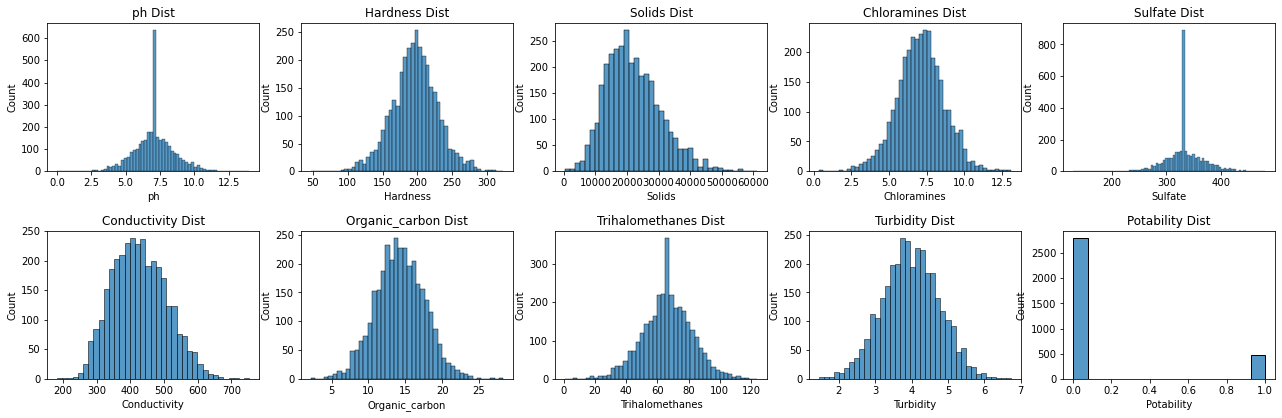

In [8]:
# Visualise various continuous distributions
continuous_distributions = ['ph', 'Hardness','Solids', 'Chloramines', 
                            'Sulfate', 'Conductivity', 'Organic_carbon',
                            'Trihalomethanes','Turbidity','Potability']

plt.figure(figsize=(22, 18))
for i, dist_col in enumerate(continuous_distributions):

  # Create subplots
    plt.subplot(5,5,i+1)
    plt.subplots_adjust(hspace = 0.4)
    sns.histplot(df1[dist_col])
    plt.title(dist_col + " Dist")
    
    


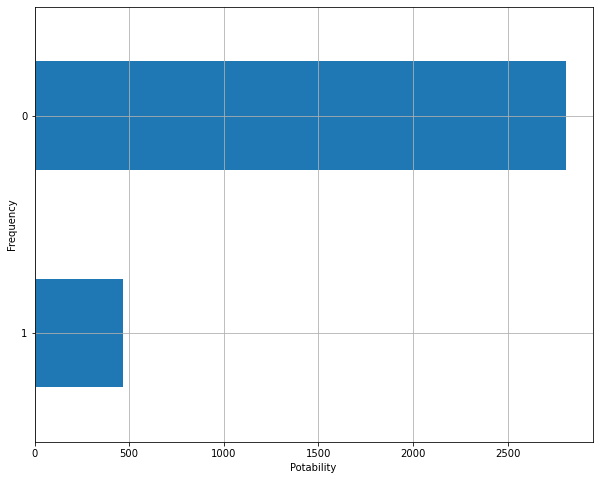

In [9]:
df1['Potability'].value_counts().sort_values().plot(kind='barh', figsize=(10,8))
plt.xlabel("Potability")
plt.ylabel("Frequency")
plt.grid()   
plt.show()  

In [10]:
cor=df1.drop('Potability',axis=1).corr()
cor

ph  Hardness    Solids  Chloramines   Sulfate  \
ph               1.000000  0.075760 -0.082004    -0.031741  0.014178   
Hardness         0.075760  1.000000 -0.046899    -0.030054 -0.092833   
Solids          -0.082004 -0.046899  1.000000    -0.070148 -0.149747   
Chloramines     -0.031741 -0.030054 -0.070148     1.000000  0.023762   
Sulfate          0.014178 -0.092833 -0.149747     0.023762  1.000000   
Conductivity     0.017466 -0.023915  0.013831    -0.020486 -0.014182   
Organic_carbon   0.040240  0.003610  0.010242    -0.012653  0.027102   
Trihalomethanes  0.003145 -0.012707 -0.008799     0.016614 -0.025657   
Turbidity       -0.036107 -0.014449  0.019546     0.002363 -0.009767   

                 Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
ph                   0.017466        0.040240         0.003145  -0.036107  
Hardness            -0.023915        0.003610        -0.012707  -0.014449  
Solids               0.013831        0.010242        -0.008799   0.019546  
Chloramines         -0.020486       -0.012653         0.016614   0.002363  
Sulfate             -0.014182        0.027102        -0.025657  -0.009767  
Conductivity         1.000000        0.020966         0.001184   0.005798  
Organic_carbon       0.020966        1.000000        -0.012958  -0.027308  
Trihalomethanes      0.001184       -0.012958         1.000000  -0.021487  
Turbidity            0.005798       -0.027308        -0.021487   1.000000

In [11]:
from warnings import filterwarnings
from collections import Counter

# Visualizations Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.offline as pyo
import plotly.express as px
import plotly.graph_objs as go
pyo.init_notebook_mode()
import plotly.figure_factory as ff
import missingno as msno
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.style.use('dark_background')
# Data Pre-processing Libraries
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split

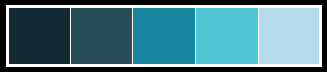

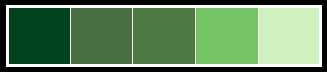

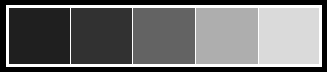

In [18]:
colors_blue = ["#132C33", "#264D58", '#17869E', '#51C4D3', '#B4DBE9']
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']
sns.palplot(colors_blue)
sns.palplot(colors_green)
sns.palplot(colors_dark)

In [13]:
fig = px.imshow(cor,height=800,width=800,color_continuous_scale=colors_blue,template='plotly_white')
fig.update_layout(font_family='monospace',
                title=dict(text='Correlation Heatmap',x=0.5,y=0.93,
                             font=dict(color=colors_dark[2],size=24)),
                coloraxis_colorbar=dict(len=0.85,x=1.1) 
                 )

fig.show()

In [14]:
fig = px.scatter_matrix(df1,df1.drop('Potability',axis=1),height=1250,width=1250,template='plotly_white',opacity=0.7,
                        color_discrete_sequence=[colors_blue[3],colors_green[3]],color='Potability',
                       symbol='Potability',color_continuous_scale=[colors_green[3],colors_blue[3]])

fig.update_layout(font_family='monospace',font_size=10,
                  coloraxis_showscale=False,
                 legend=dict(x=0.02,y=1.07,bgcolor=colors_dark[4]),
                 title=dict(text='Scatter Plot Matrix',x=0.5,y=0.97,
                   font=dict(color=colors_dark[2],size=24)))
fig.show()

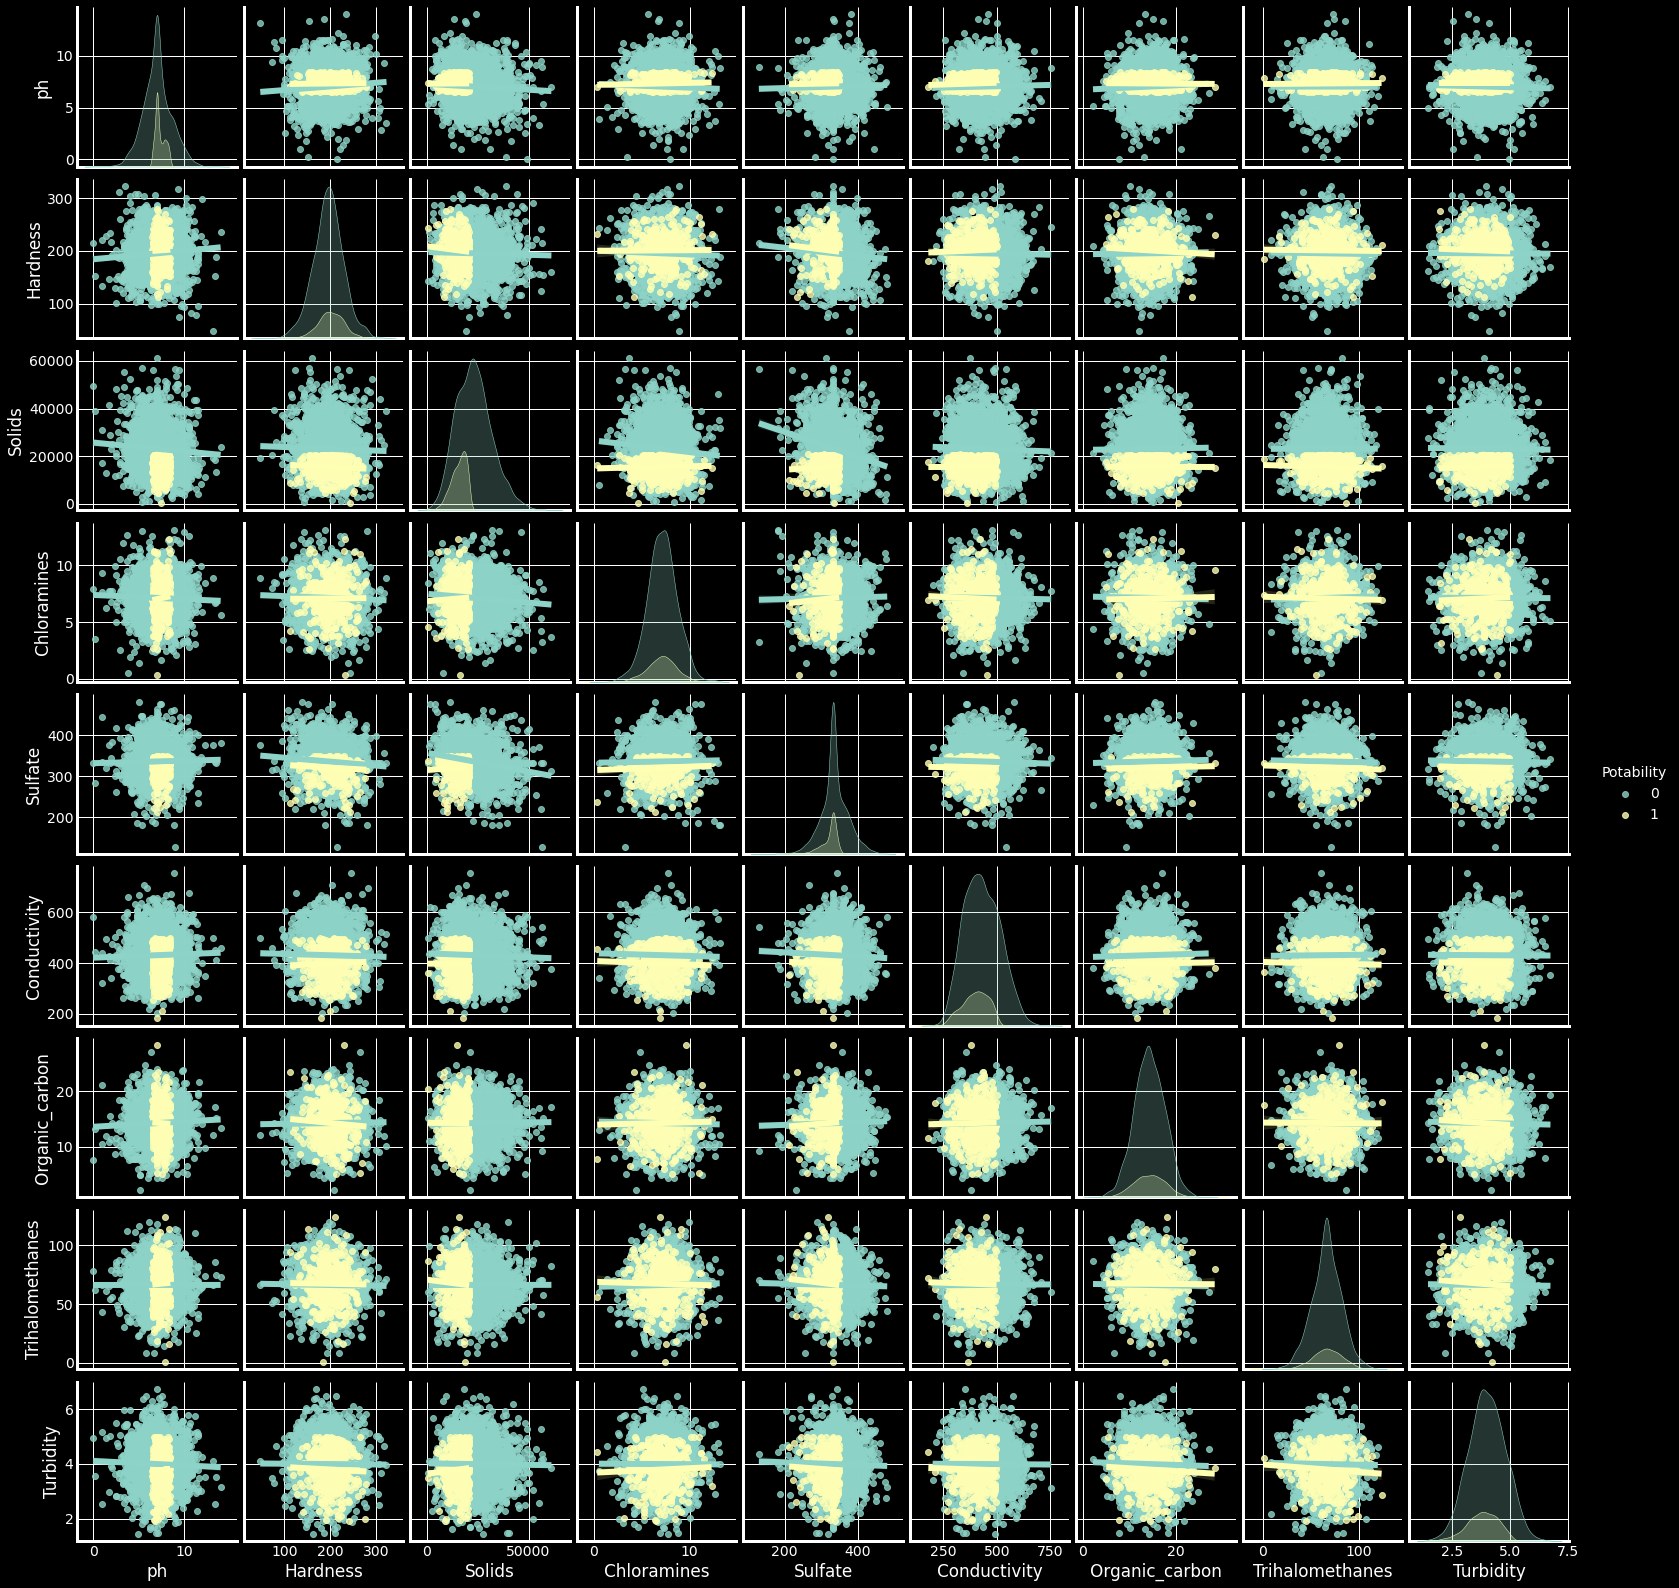

In [19]:
sns.pairplot(df1, hue='Potability', kind='reg')

In [16]:
y = df1['Potability']
X = df1.drop('Potability', axis=1)

X.head()

ph    Hardness       Solids  Chloramines     Sulfate  Conductivity  \
0  7.036752  204.890456  20791.31898     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.05786     6.635246  333.073546    592.885359   
2  8.099124  224.236259  19909.54173     9.275884  333.073546    418.606213   
3  8.316766  214.373394  22018.41744     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.98634     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  
0       10.379783        86.990970   2.963135  
1       15.180013        56.329076   4.500656  
2       16.868637        66.420093   3.055934  
3       18.436525       100.341674   4.628771  
4       11.558279        31.997993   4.075075

<function matplotlib.pyplot.show(close=None, block=None)>

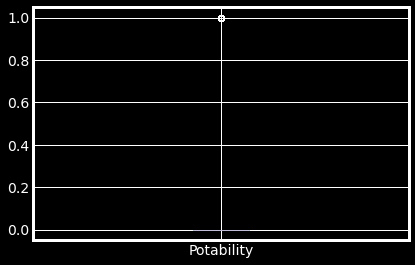

In [17]:
df1.boxplot(column=['Potability'])
plt.show 

In [282]:
cols = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity']

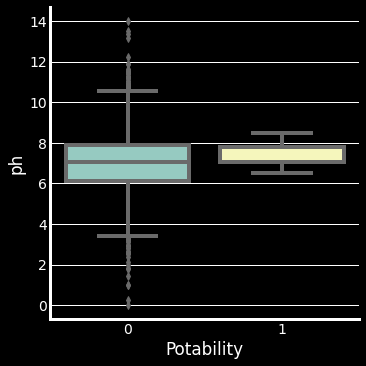

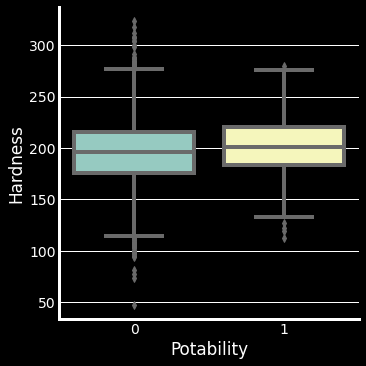

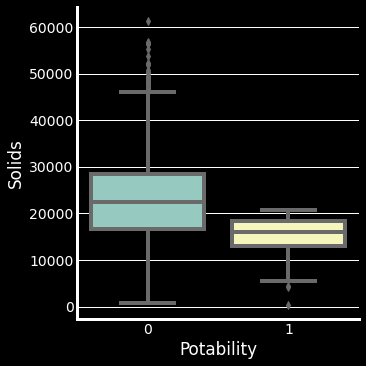

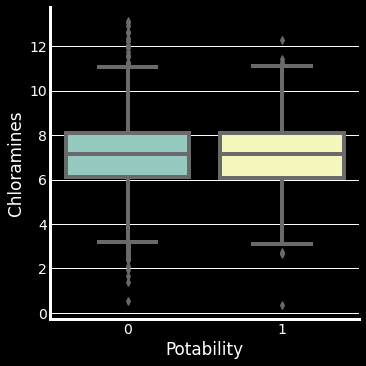

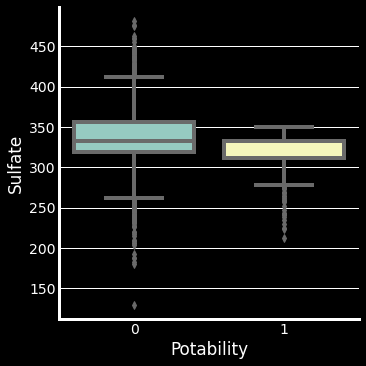

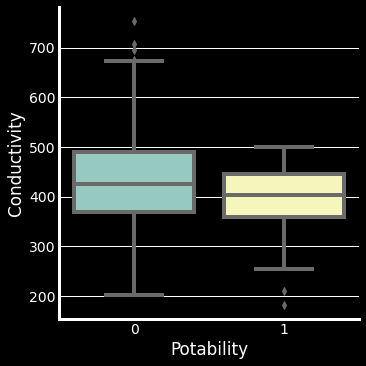

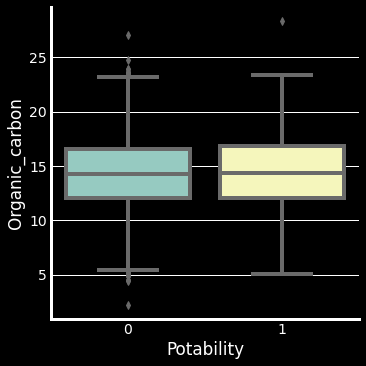

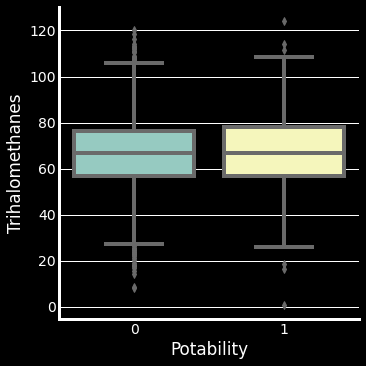

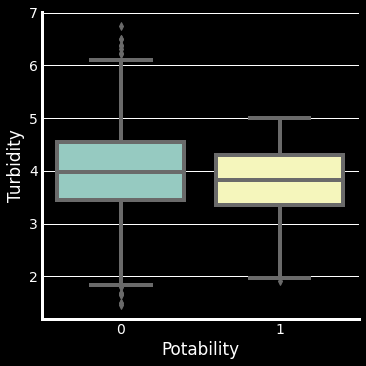

In [21]:
sns.catplot(x="Potability", y='ph',data=df1, kind="box")
sns.catplot(x="Potability", y='Hardness', data=df1, kind="box")
sns.catplot(x="Potability", y='Solids', data=df1, kind="box")
sns.catplot(x="Potability", y='Chloramines', data=df1, kind="box")
sns.catplot(x="Potability", y='Sulfate', data=df1, kind="box")
sns.catplot(x="Potability", y='Conductivity', data=df1, kind="box")
sns.catplot(x="Potability", y='Organic_carbon', data=df1, kind="box")
sns.catplot(x="Potability", y='Trihalomethanes', data=df1, kind='box')
sns.catplot(x="Potability", y='Turbidity', data=df1, kind="box");

Your Charts are being ready:   0%|          | 0/9 [00:00<?, ?it/s]

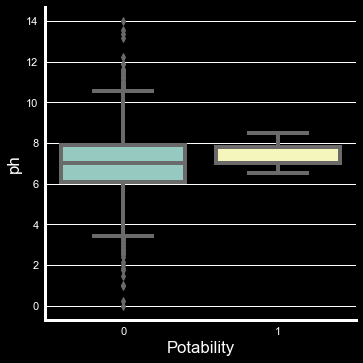

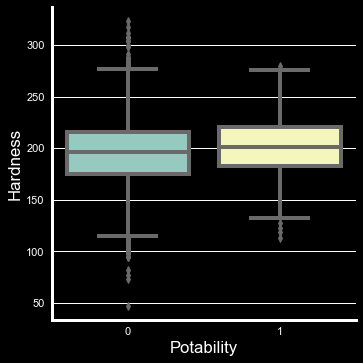

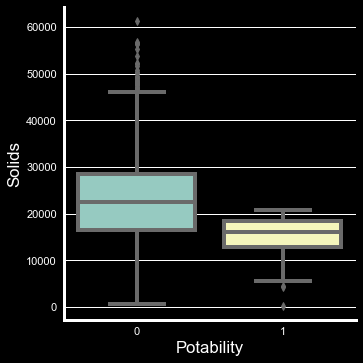

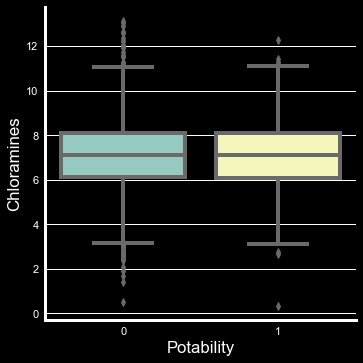

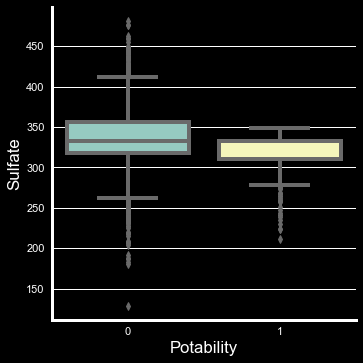

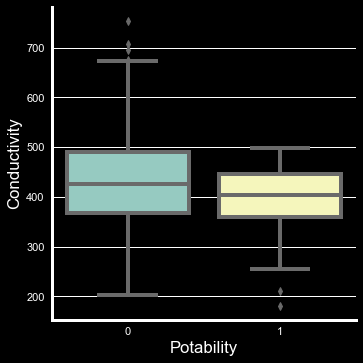

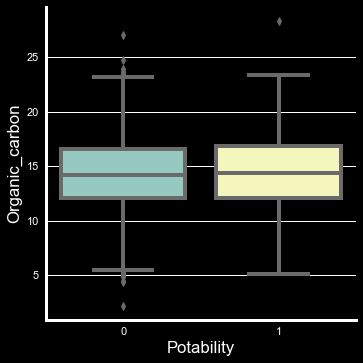

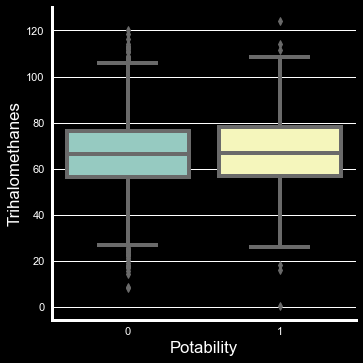

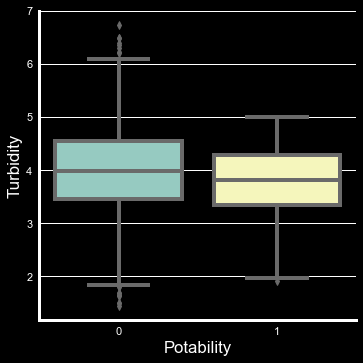

In [283]:
def boxPlotter(dataset, columnName):
    """
    Plots boxplots for column given as parameter.
    """
    sns.catplot(x="Potability", y=columnName, data=df1, kind="box");
for column in tqdm_notebook(cols, desc = "Your Charts are being ready"):
    boxPlotter(df1, column)

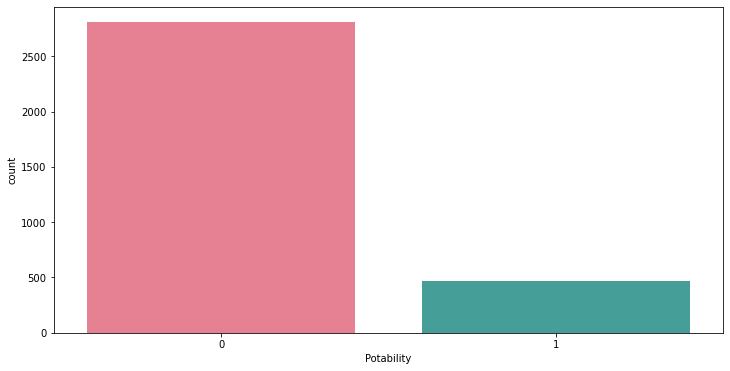

In [24]:
plt.figure(figsize=(12, 6))
sns.countplot(x="Potability", data=df1, palette='husl');

In [105]:
def pieChartPlotter(dataset, columnName):
    """
    Creates pie chart of the column given as parameter in the dataset
    """
    values = dataset[columnName].value_counts()
    labels = dataset[columnName].unique()
    pie, ax = plt.subplots(figsize=[10, 6])

    patches, texts, autotexts = ax.pie(values, labels=labels, autopct='%1.2f%%', shadow=True, pctdistance=.5,explode=[0.06]*dataset[columnName].unique()
                                       )

    plt.legend(patches, labels, loc="best")
    plt.title(columnName, color='white', fontsize=14)
    plt.setp(texts, color='white', fontsize=20)
    plt.setp(autotexts, size=10, color='black')
    autotexts[1].set_color('black')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

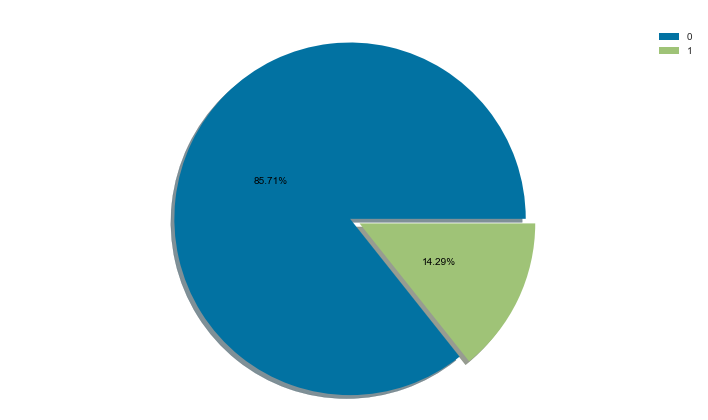

In [106]:
pieChartPlotter(df1, 'Potability') 

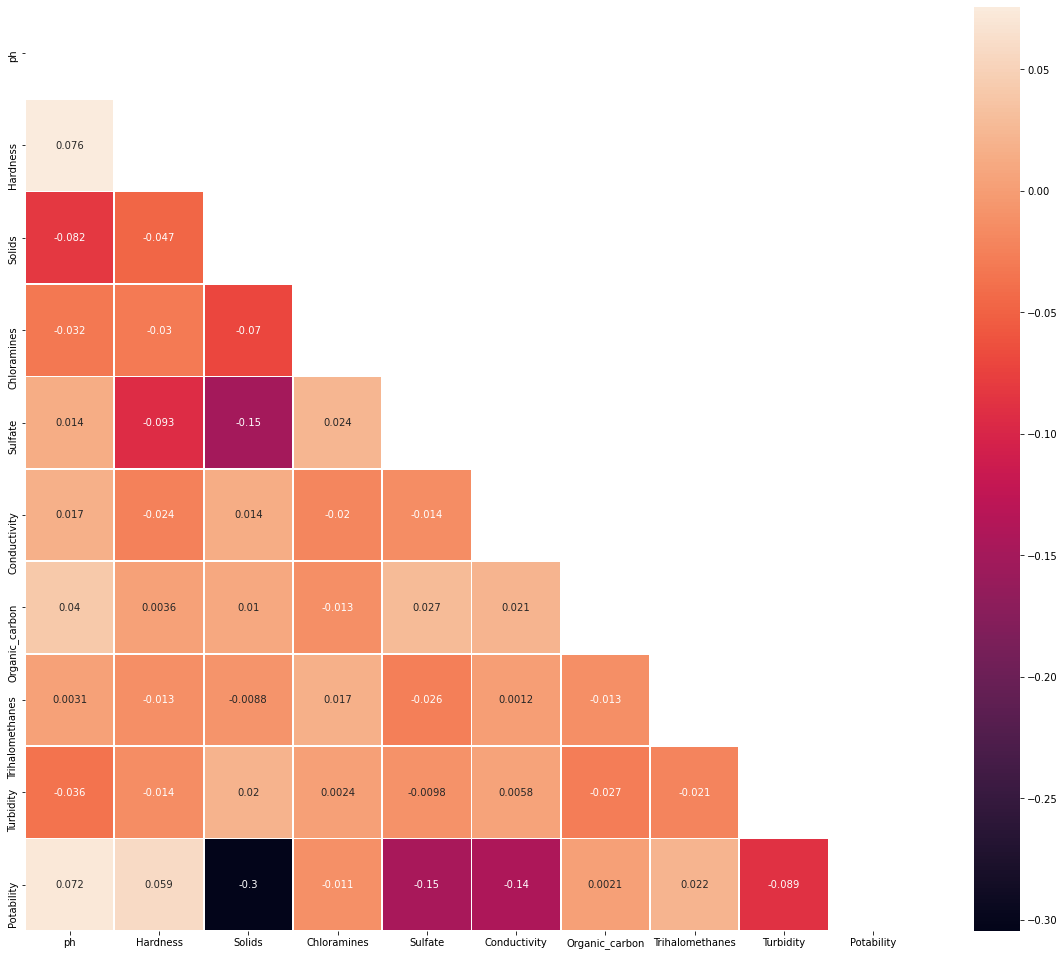

In [37]:
plt.figure(figsize=(20, 17))
matrix = np.triu(df1.corr())
sns.heatmap(df1.corr(), annot=True,linewidth=.8, mask=matrix, cmap="rocket");

In [38]:
def distributionPlot(dataset):
    """ 
    Creates distribution plot.
    """
    fig = plt.figure(figsize=(20, 20))
    for i in tqdm_notebook(range(0, len(dataset.columns)), desc = 'Your plots are being ready'):
        fig.add_subplot(np.ceil(len(dataset.columns)/3), 3, i+1)
        sns.distplot(
            dataset.iloc[:, i], color="lightcoral", rug=True)
        fig.tight_layout(pad=3.0)

Your plots are being ready:   0%|          | 0/10 [00:00<?, ?it/s]

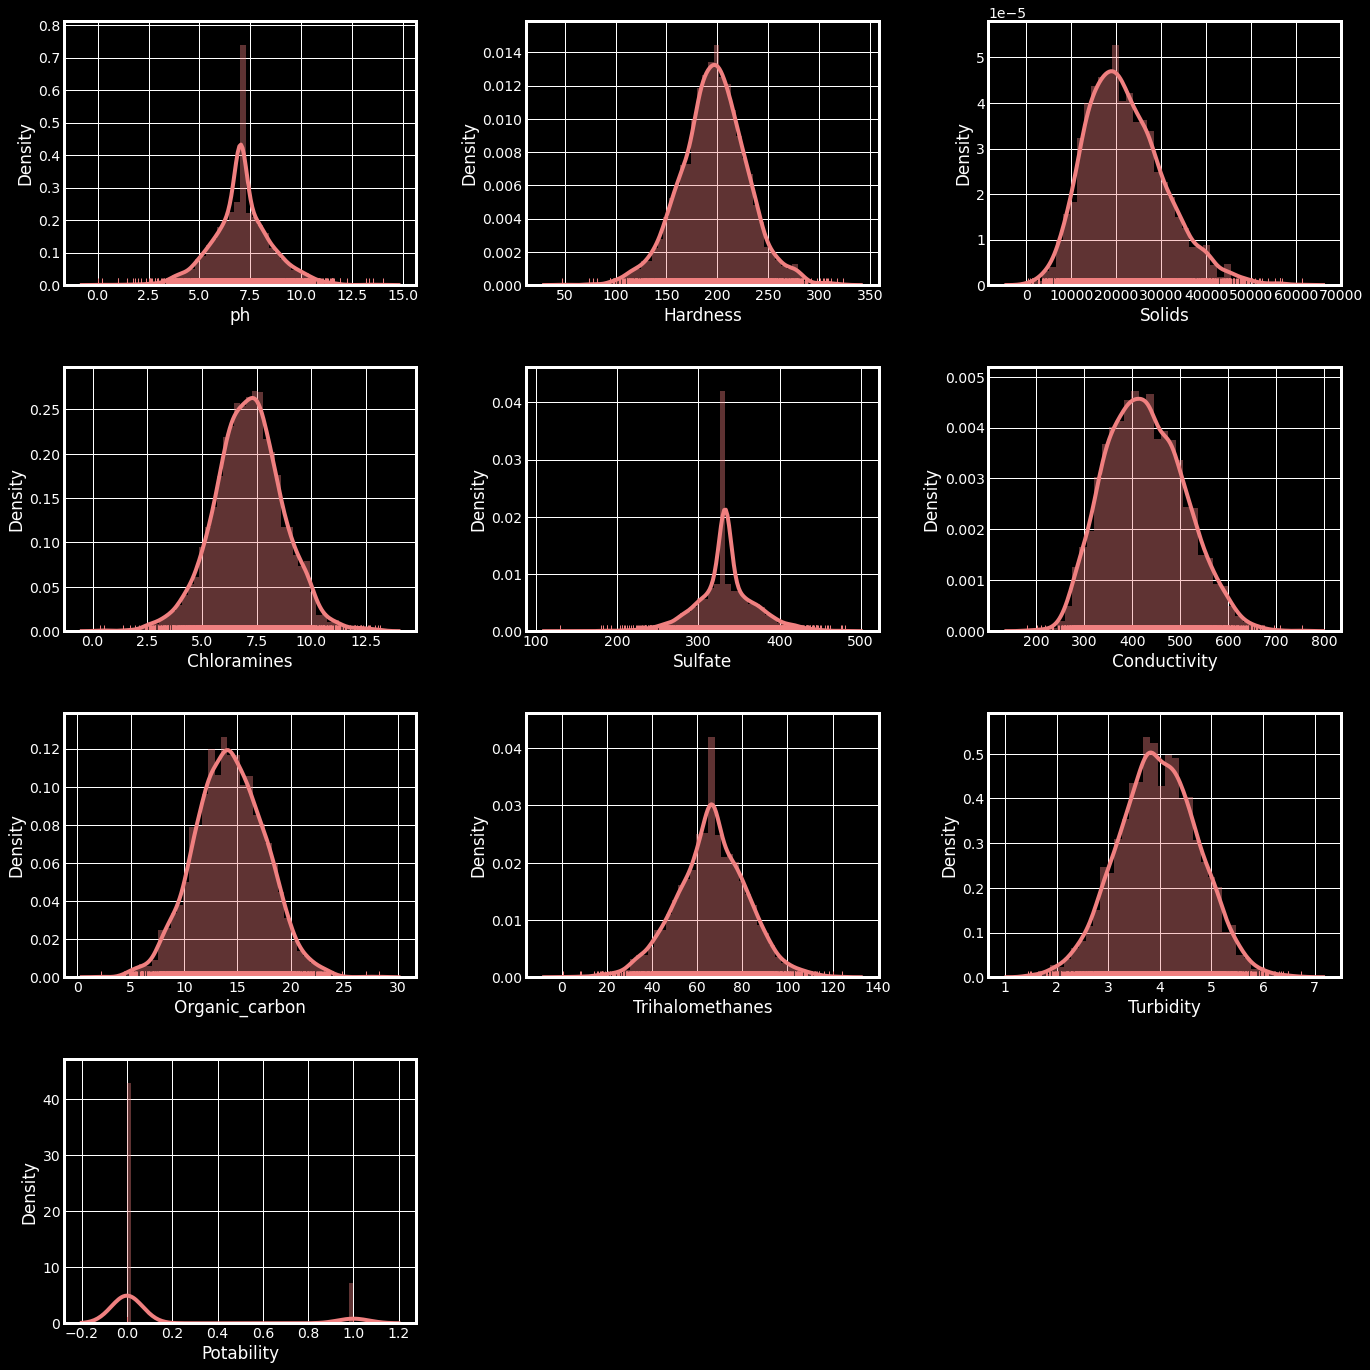

In [42]:
distributionPlot(df1)

In [47]:
from luciferml.supervised.classification import Classification
from luciferml.preprocessing import Preprocess as prep


<div class="burk">
#preprossess above eda</div><i class="fa fa-lightbulb-o "></i>

In [50]:
#pip install lucifer-ml


          
██╗░░░░░██╗░░░██╗░█████╗░██╗███████╗███████╗██████╗░░░░░░░███╗░░░███╗██╗░░░░░
██║░░░░░██║░░░██║██╔══██╗██║██╔════╝██╔════╝██╔══██╗░░░░░░████╗░████║██║░░░░░
██║░░░░░██║░░░██║██║░░╚═╝██║█████╗░░█████╗░░██████╔╝█████╗██╔████╔██║██║░░░░░
██║░░░░░██║░░░██║██║░░██╗██║██╔══╝░░██╔══╝░░██╔══██╗╚════╝██║╚██╔╝██║██║░░░░░
███████╗╚██████╔╝╚█████╔╝██║██║░░░░░███████╗██║░░██║░░░░░░██║░╚═╝░██║███████╗
╚══════╝░╚═════╝░░╚════╝░╚═╝╚═╝░░░░░╚══════╝╚═╝░░╚═╝░░░░░░╚═╝░░░░░╚═╝╚══════╝

Started Preprocessor 


Skewness in numerical features: 

                 Skewness
Solids           0.621350
Conductivity     0.264369
ph               0.041248
Organic_carbon   0.025521
Turbidity       -0.007813
Chloramines     -0.012093
Sulfate         -0.027265
Hardness        -0.039324
Trihalomethanes -0.087249
Skewness Before Transformation for Solids:  0.6216344855369534 

Mean before Transformation for Solids : 22014.09252612909, Standard Deviation before Transformation for Solids : 8767.232421203751 



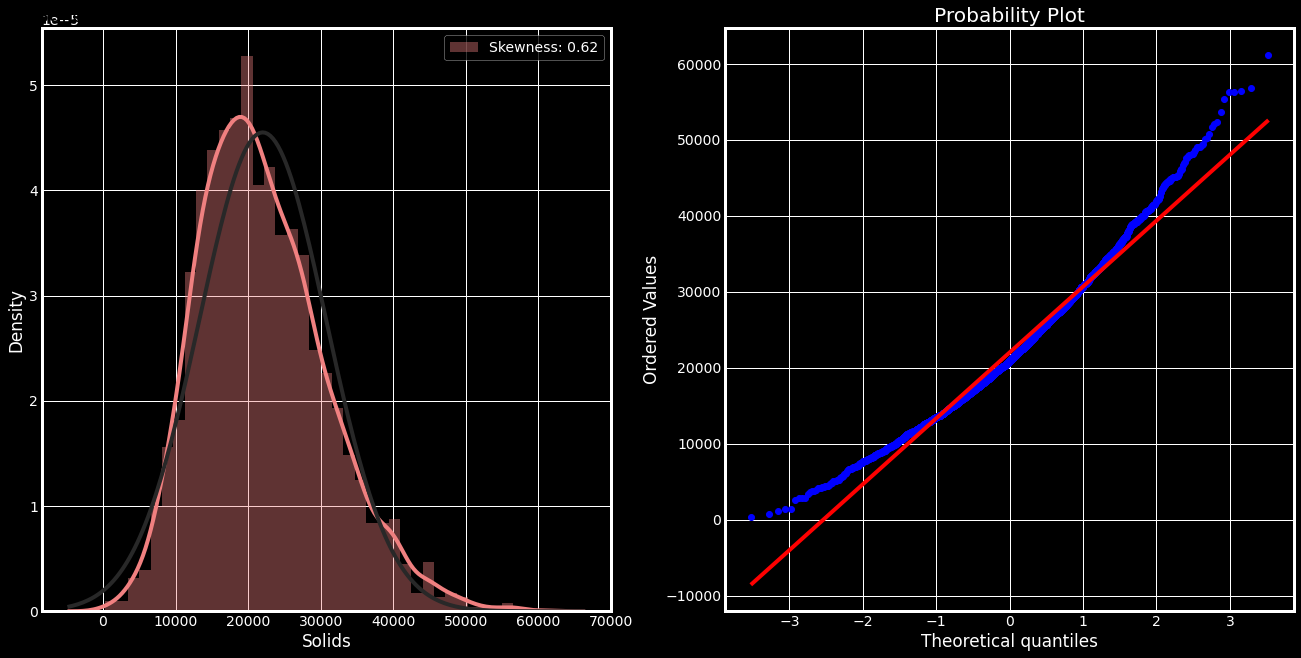

Skewness After Transformation for Solids:  -1.135066582082669 

Mean before Transformation for Solids : 9.911939065056101, Standard Deviation before Transformation for Solids : 0.4453239830112678 



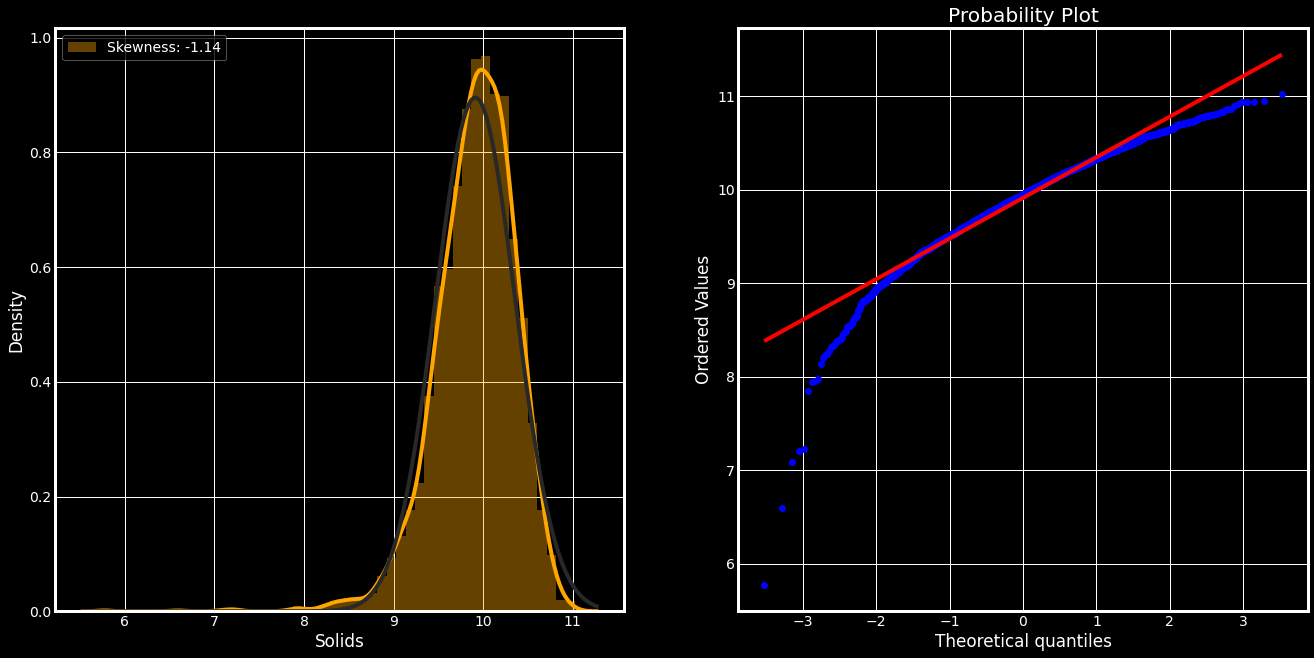

Skewness Before Transformation for Conductivity:  0.2644902239331309 

Mean before Transformation for Conductivity : 426.205110682326, Standard Deviation before Transformation for Conductivity : 80.811727324785 



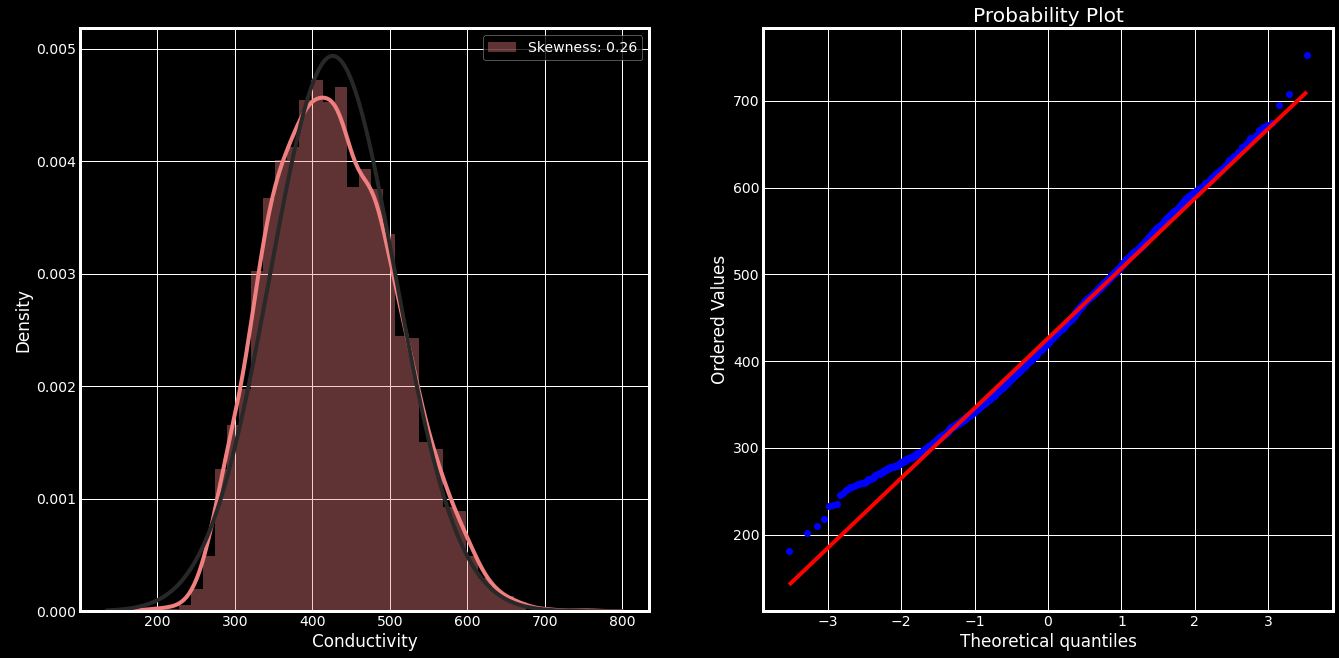

Skewness After Transformation for Conductivity:  -0.20698467949135138 

Mean before Transformation for Conductivity : 6.039119631917802, Standard Deviation before Transformation for Conductivity : 0.1918430867146686 



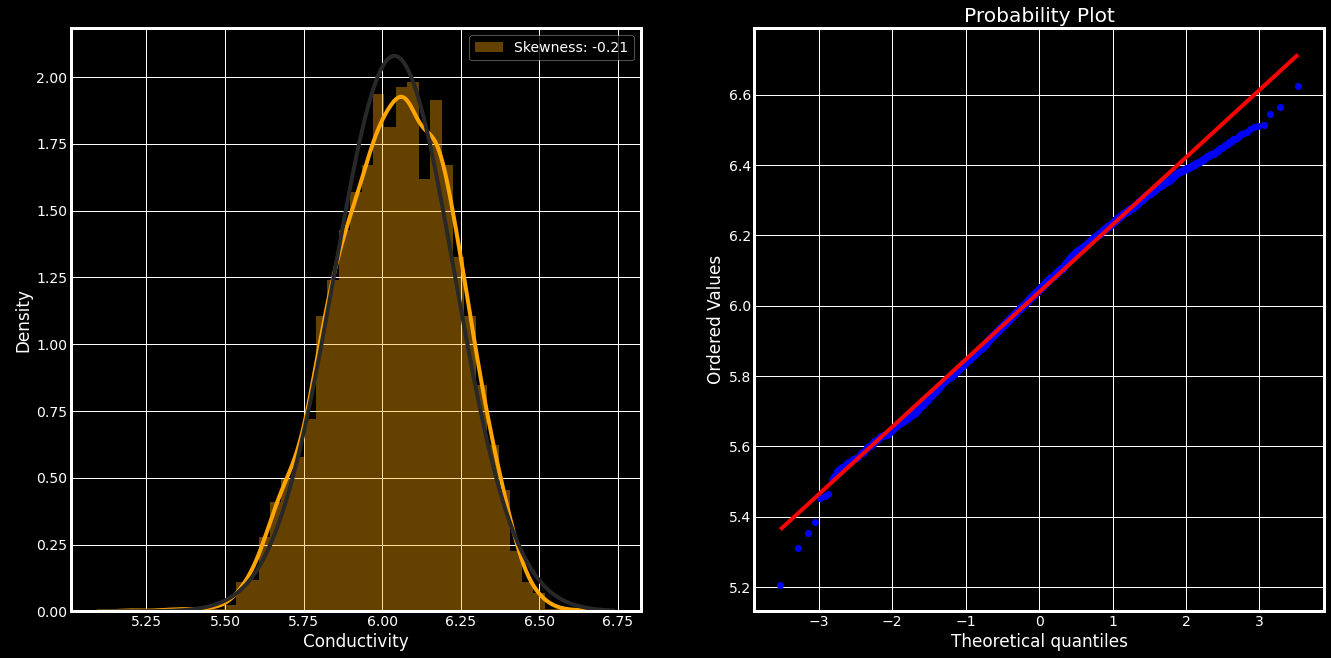

Skewness Before Transformation for ph:  0.04126642292483538 

Mean before Transformation for Ph : 7.074193521806166, Standard Deviation before Transformation for Ph : 1.4698156780868716 



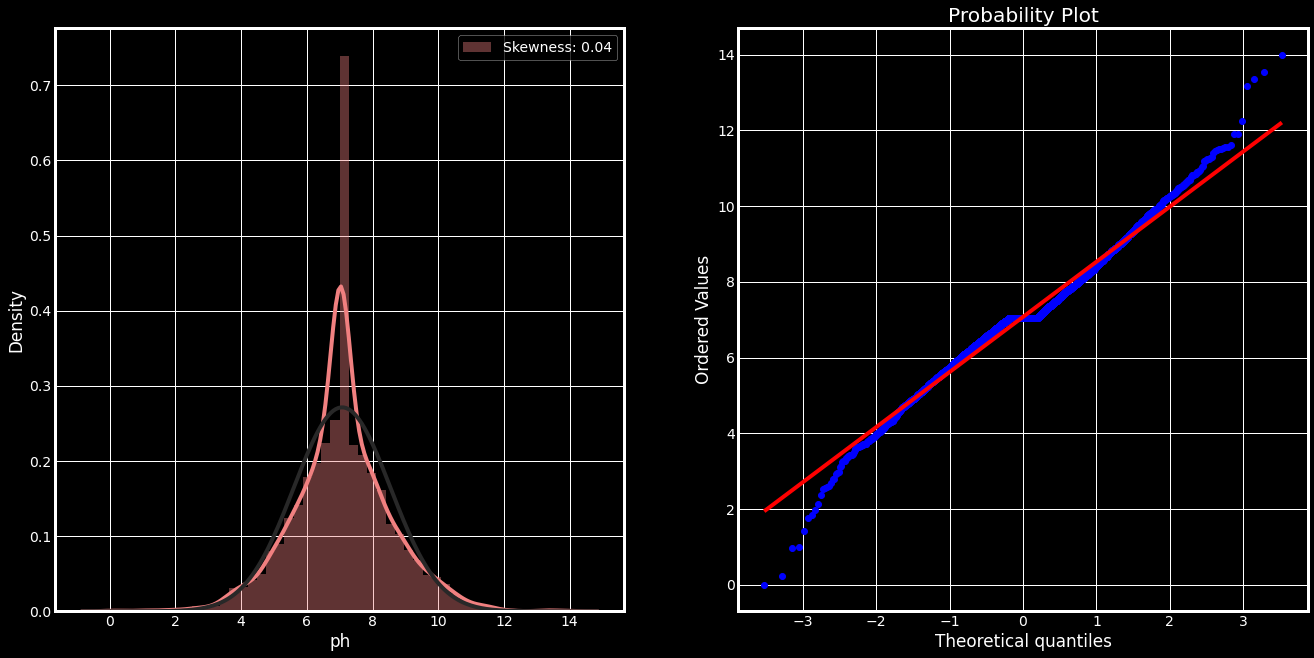

Skewness After Transformation for ph:  -1.4814679349016644 

Mean before Transformation for Ph : 2.0705472750580163, Standard Deviation before Transformation for Ph : 0.1979629953680859 



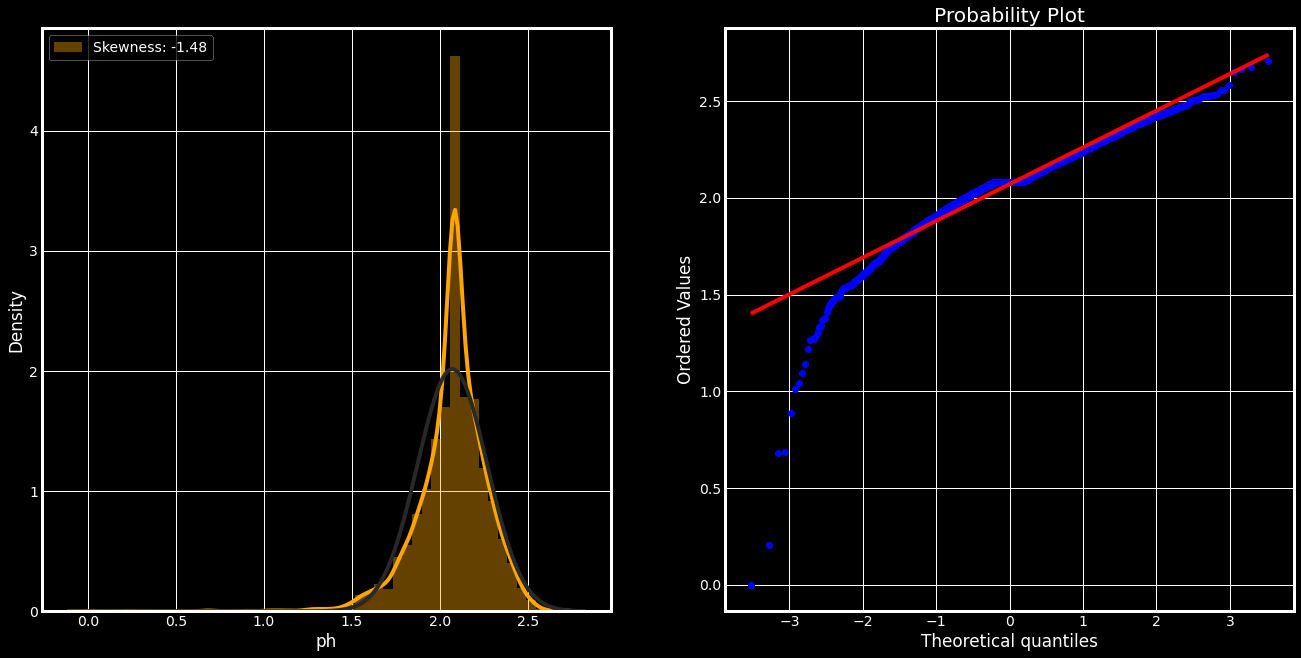

Skewness Before Transformation for Organic_carbon:  0.025532581980578006 

Mean before Transformation for Organic_carbon : 14.284970247676128, Standard Deviation before Transformation for Organic_carbon : 3.30765705175547 



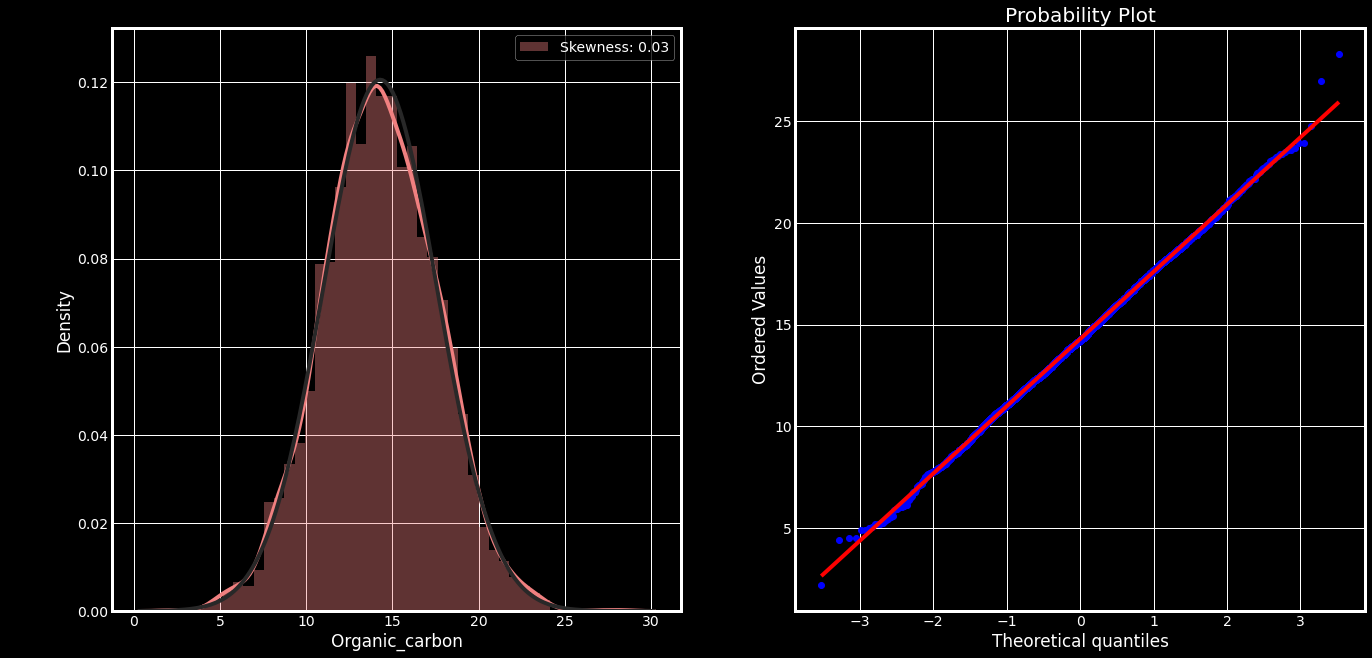

Skewness After Transformation for Organic_carbon:  -0.782845472749622 

Mean before Transformation for Organic_carbon : 2.7015714762290512, Standard Deviation before Transformation for Organic_carbon : 0.23132603813648211 



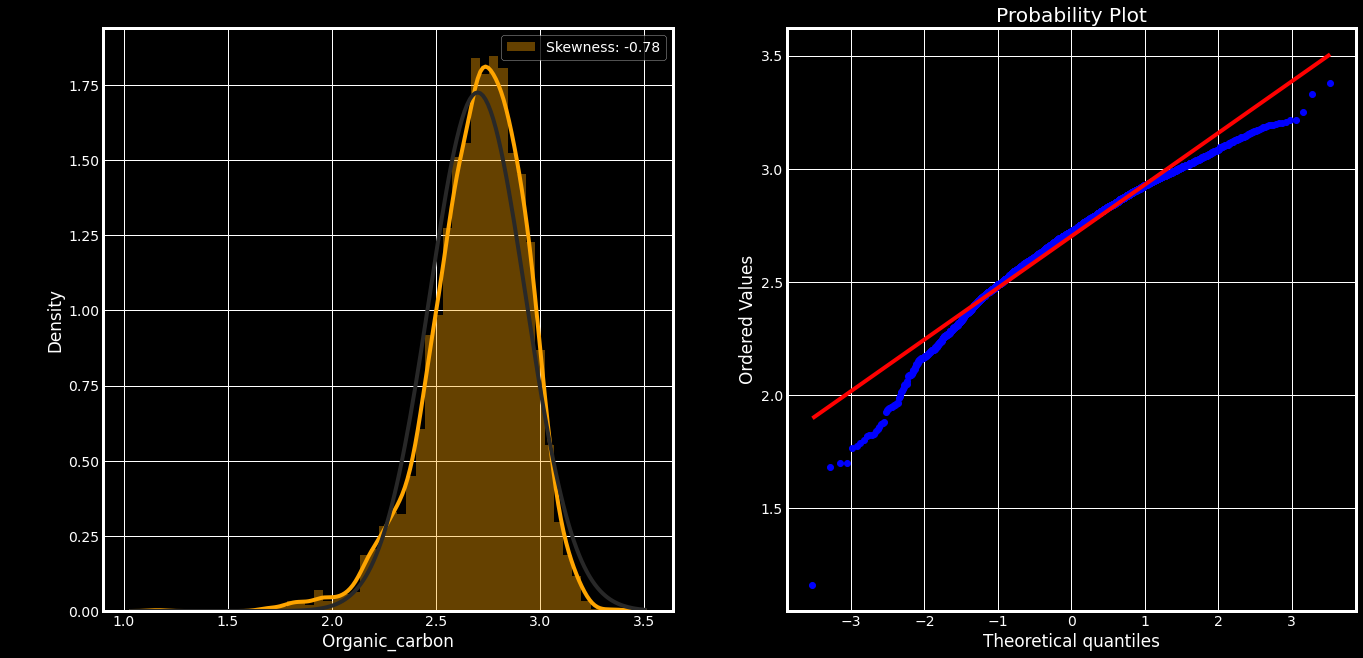

Skewness Before Transformation for Turbidity:  -0.00781664235833942 

Mean before Transformation for Turbidity : 3.966786169797009, Standard Deviation before Transformation for Turbidity : 0.7802632934000865 



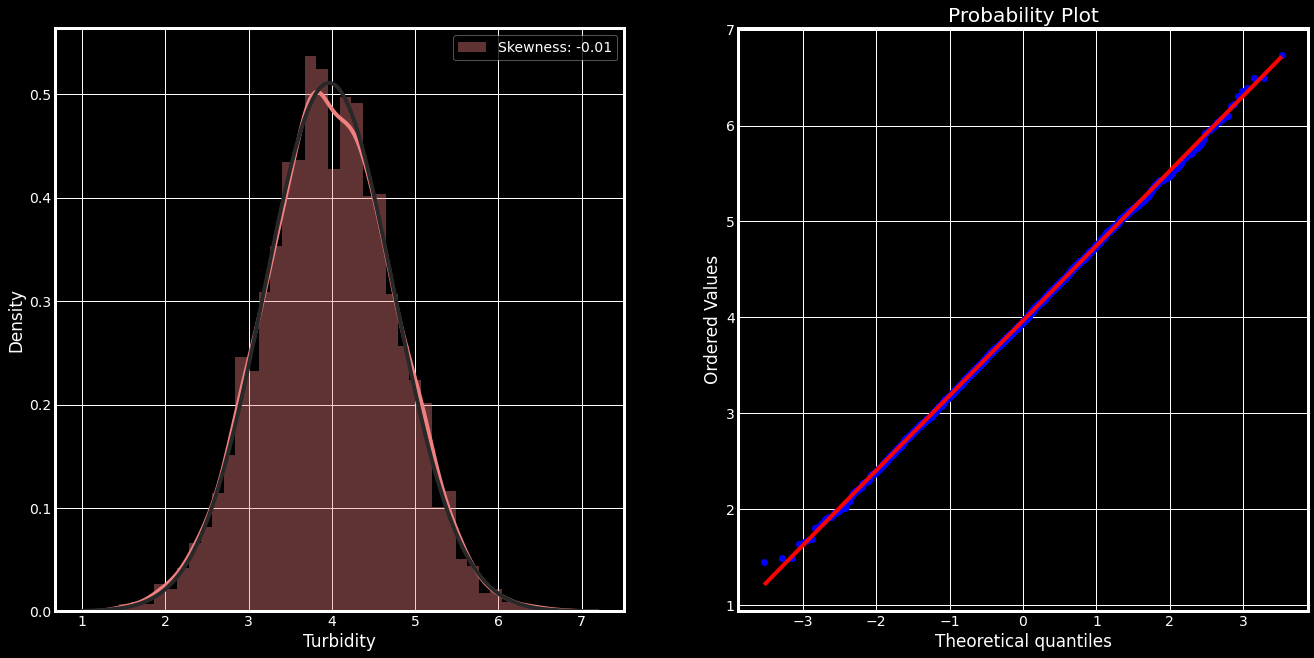

Skewness After Transformation for Turbidity:  -0.5052622653070542 

Mean before Transformation for Turbidity : 1.5899367101140967, Standard Deviation before Transformation for Turbidity : 0.16238085257866383 



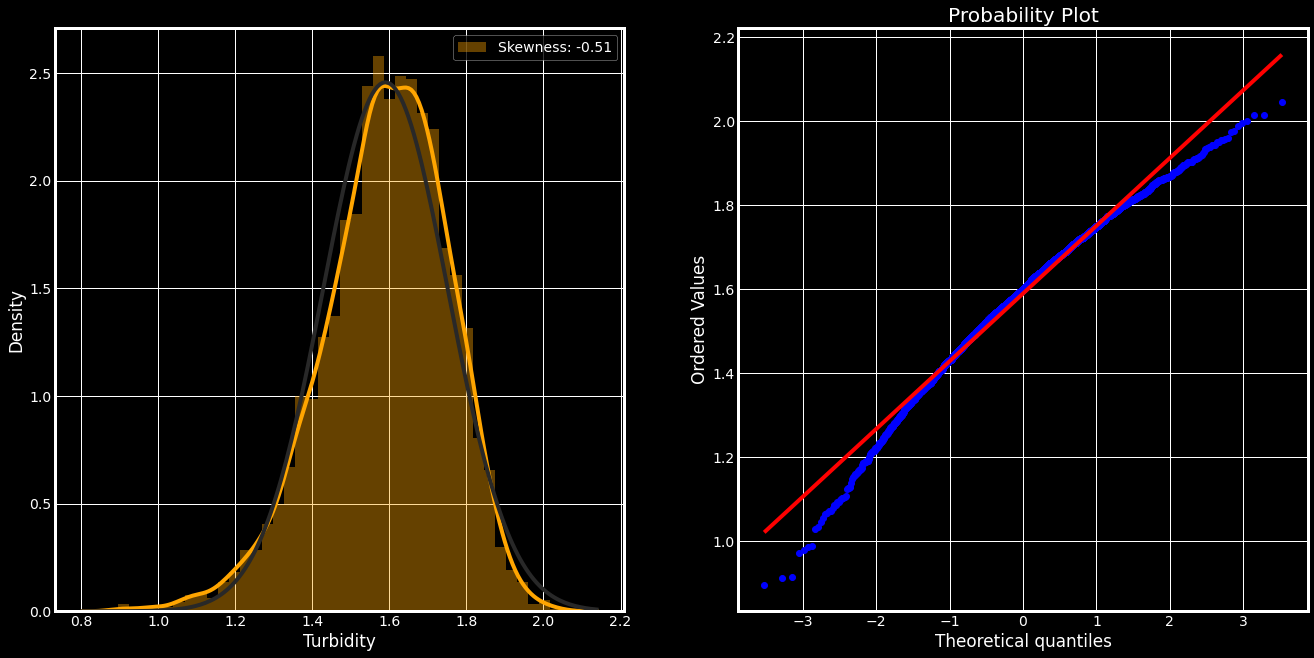

Skewness Before Transformation for Chloramines:  -0.012098439994083152 

Mean before Transformation for Chloramines : 7.122276793427656, Standard Deviation before Transformation for Chloramines : 1.5828432520464306 



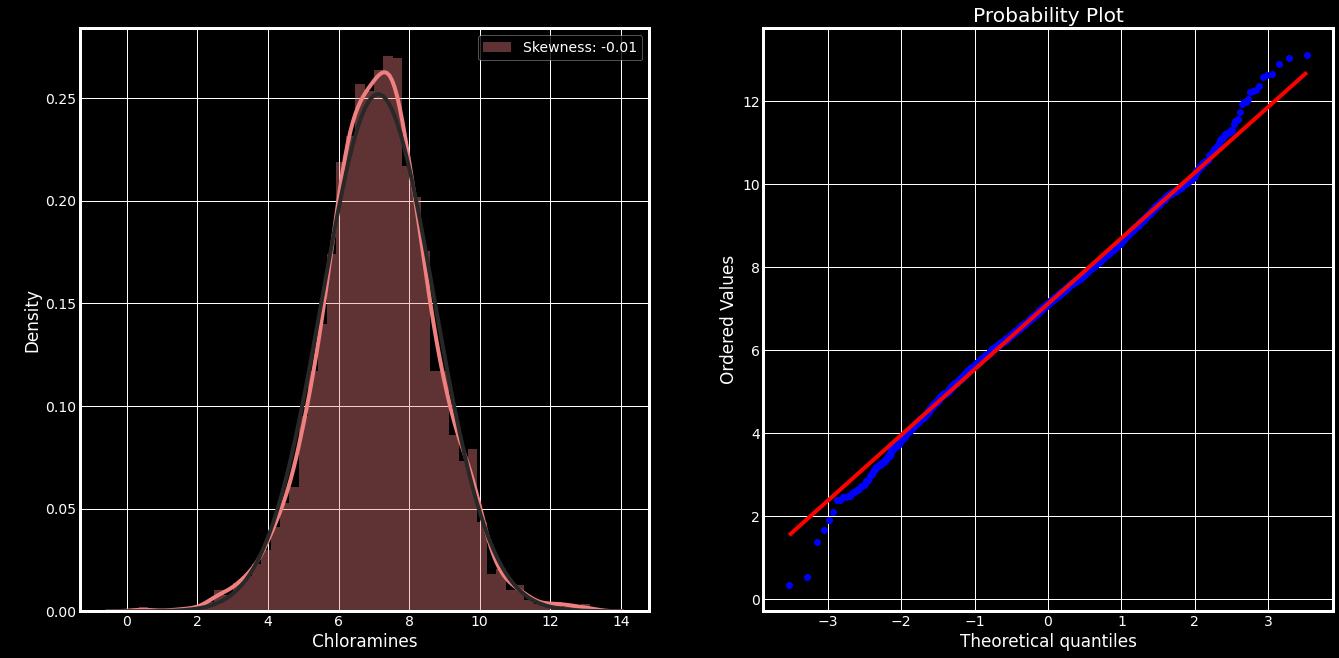

Skewness After Transformation for Chloramines:  -1.0823152408728296 

Mean before Transformation for Chloramines : 2.0739421649277023, Standard Deviation before Transformation for Chloramines : 0.21006903089252843 



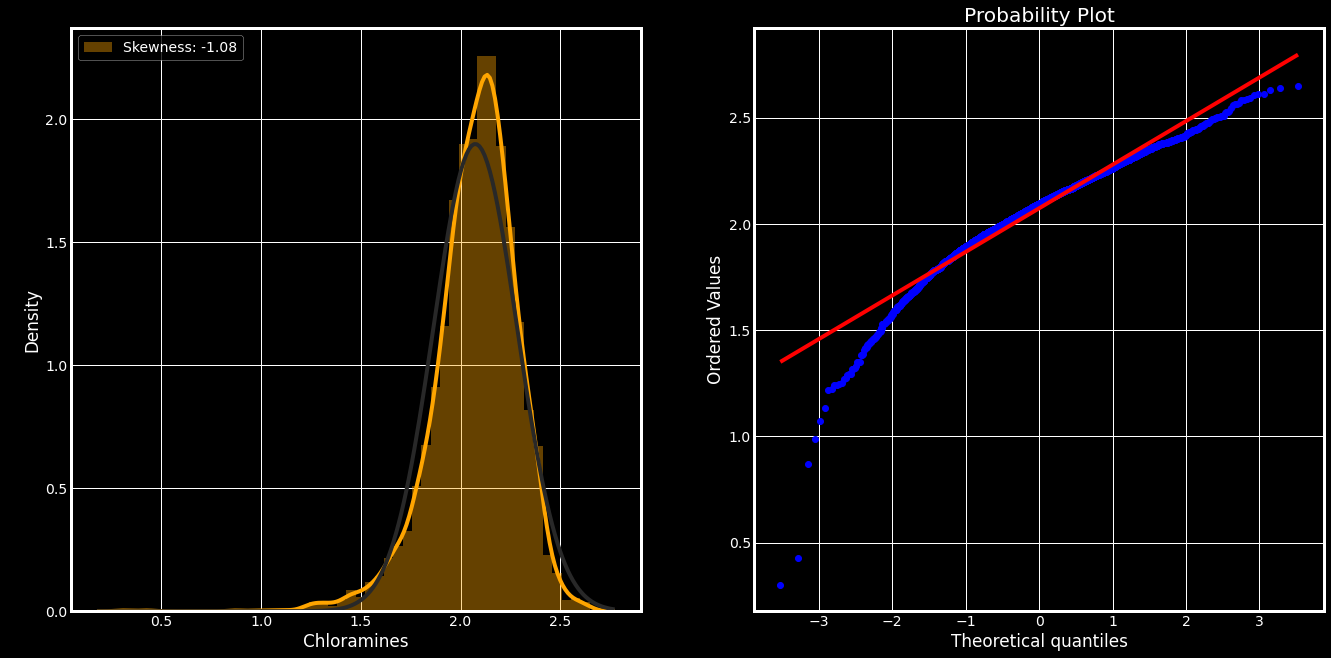

Skewness Before Transformation for Sulfate:  -0.027277808092229468 

Mean before Transformation for Sulfate : 333.60836441846766, Standard Deviation before Transformation for Sulfate : 36.138334278747735 



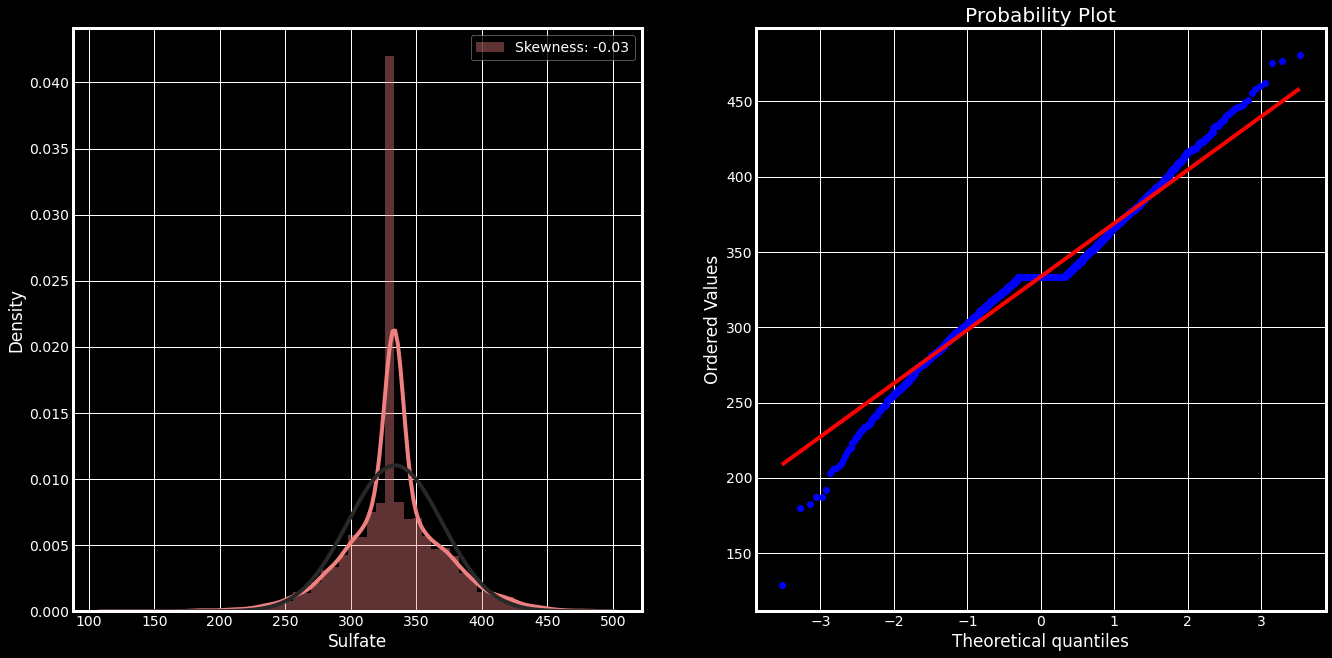

Skewness After Transformation for Sulfate:  -0.7643490781435033 

Mean before Transformation for Sulfate : 5.806931307195277, Standard Deviation before Transformation for Sulfate : 0.11119670079262454 



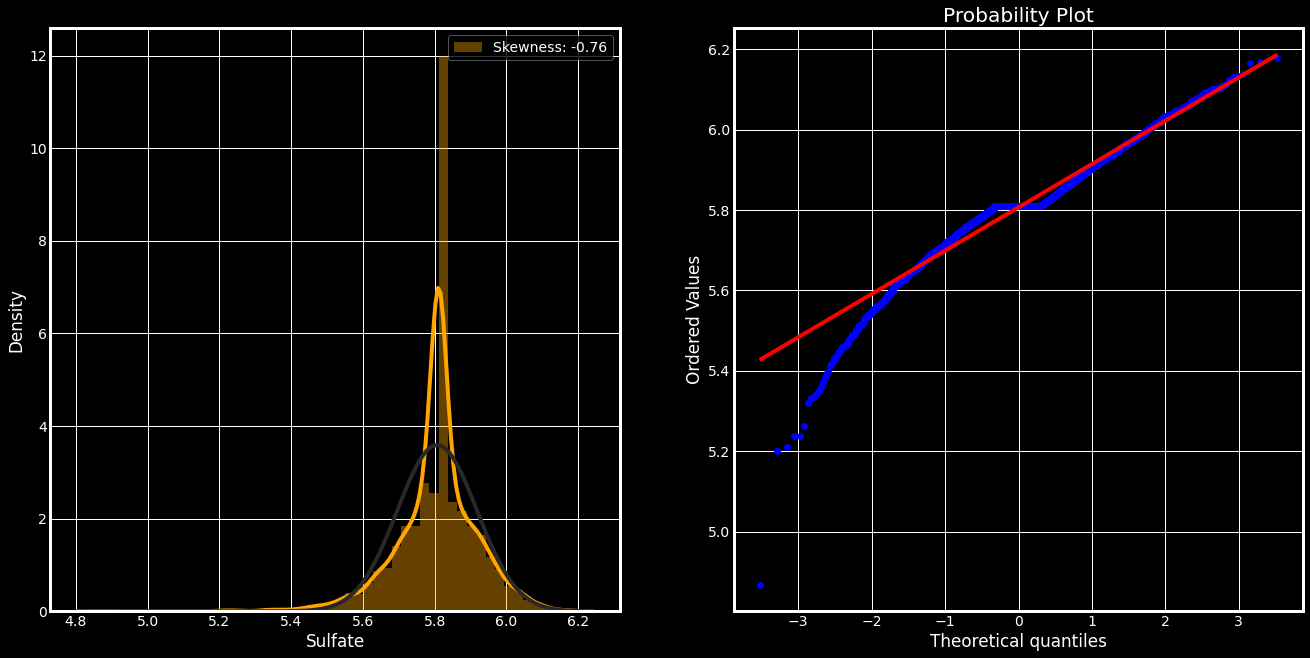

Skewness Before Transformation for Hardness:  -0.039341704731212956 

Mean before Transformation for Hardness : 196.3694960176221, Standard Deviation before Transformation for Hardness : 32.874742814782266 



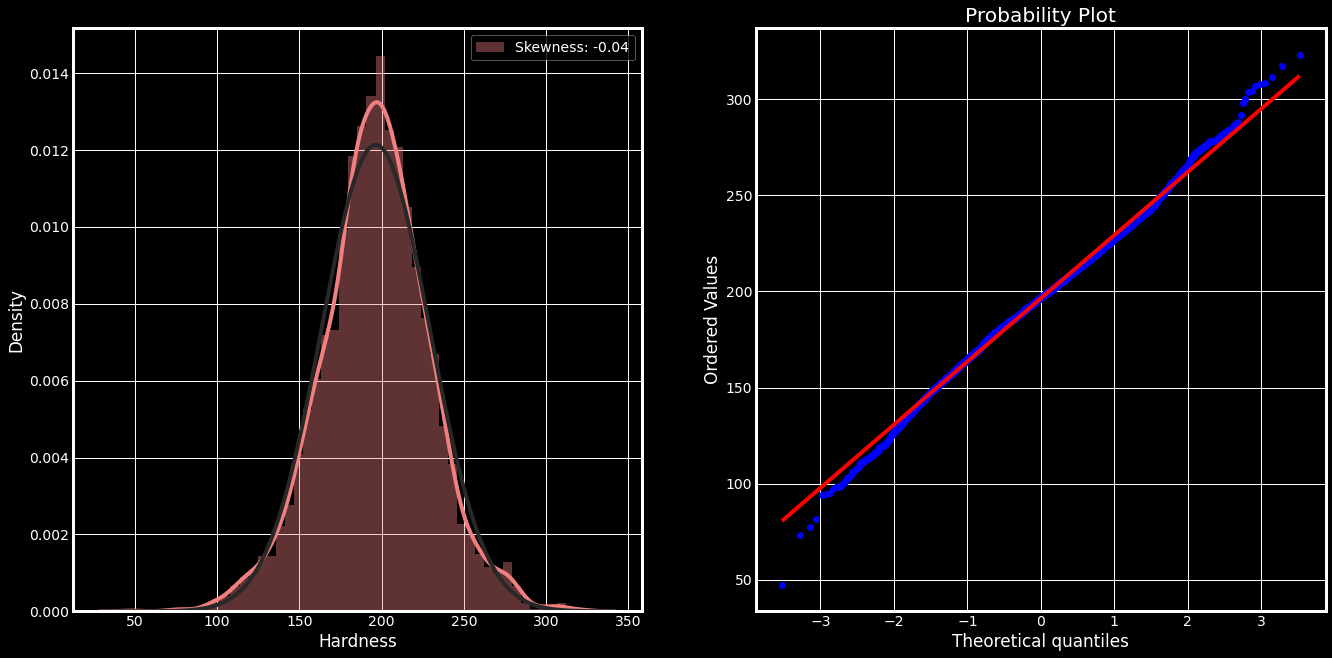

Skewness After Transformation for Hardness:  -0.8457598144297507 

Mean before Transformation for Hardness : 5.2703229397471665, Standard Deviation before Transformation for Hardness : 0.17566744540119678 



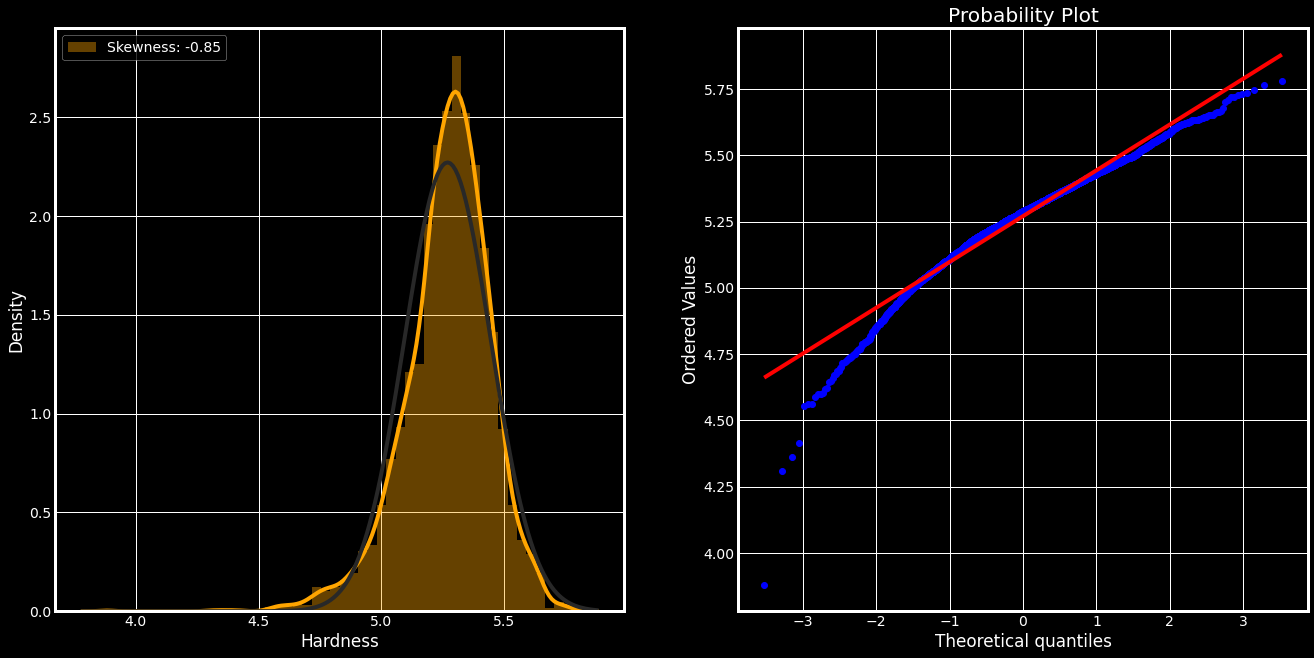

Skewness Before Transformation for Trihalomethanes:  -0.08728878038462994 

Mean before Transformation for Trihalomethanes : 66.40747827292338, Standard Deviation before Transformation for Trihalomethanes : 15.767550470286237 



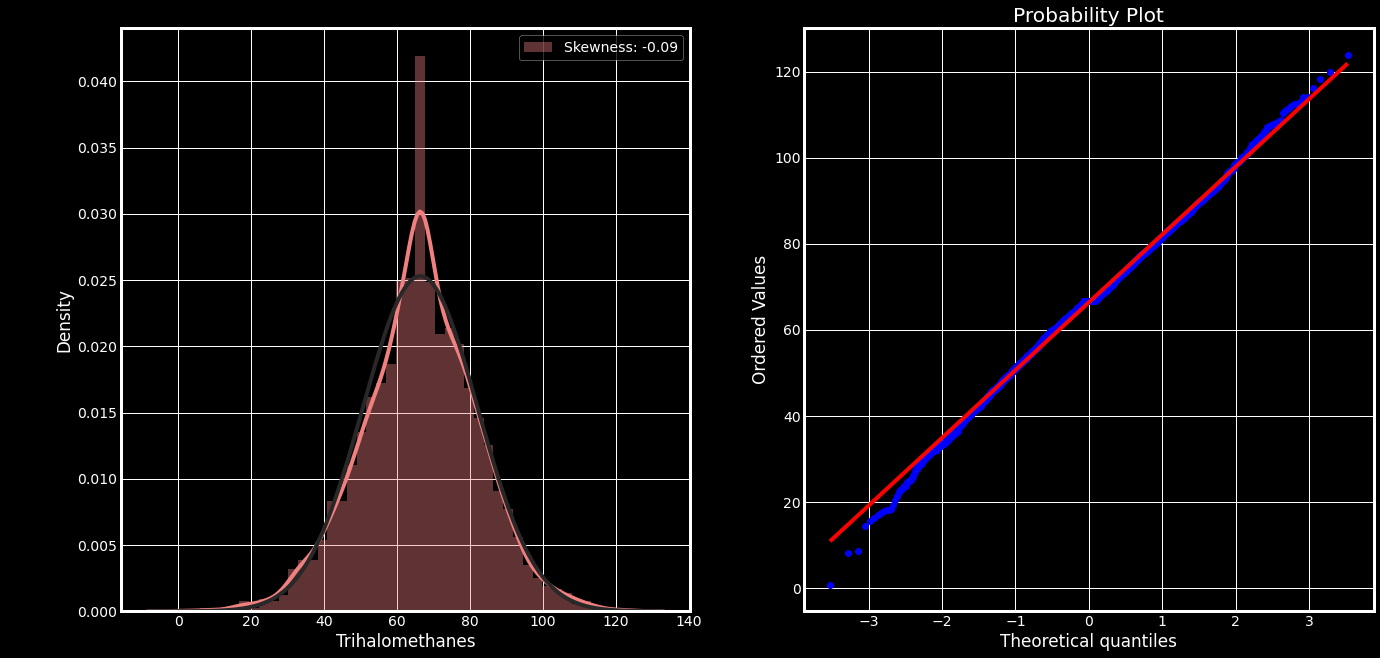

Skewness After Transformation for Trihalomethanes:  -1.8970880884007915 

Mean before Transformation for Trihalomethanes : 4.17903884811003, Standard Deviation before Transformation for Trihalomethanes : 0.26828041748558884 



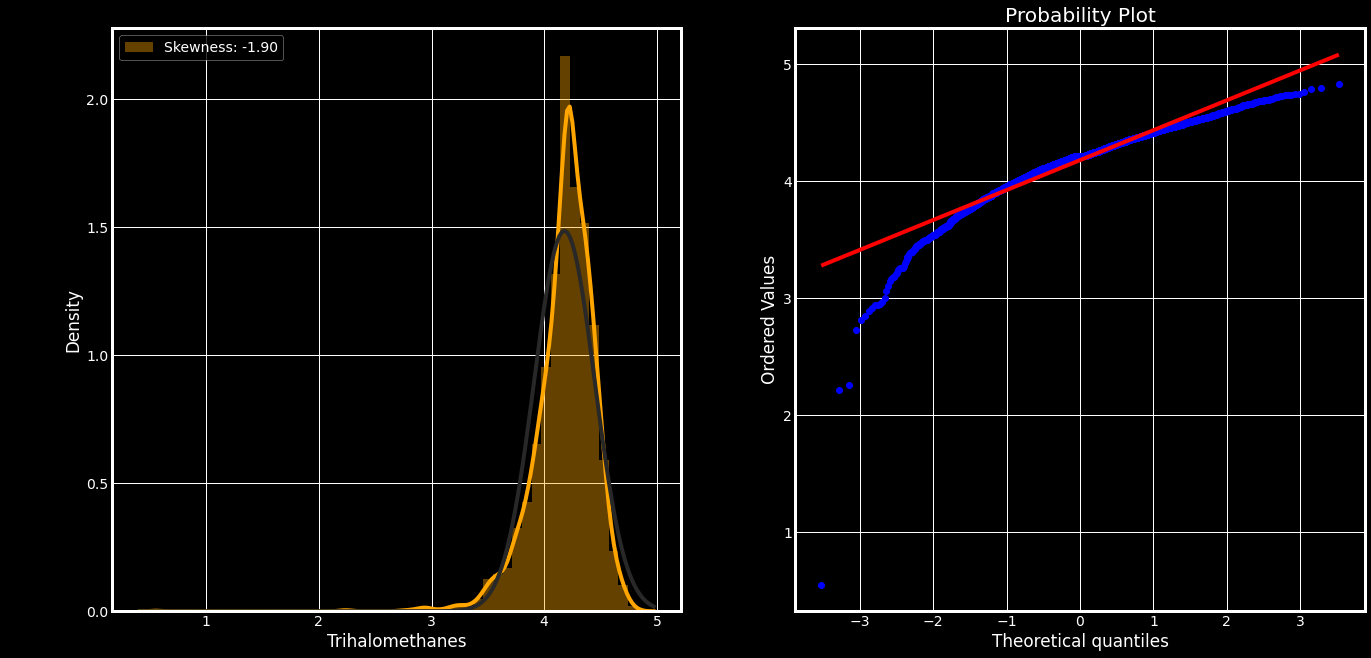

Elapsed Time:  6.411972761154175 seconds



In [51]:
df12 = prep.skewcorrect(df1,except_columns=['Potability'])

In [98]:
X = df1.drop('Potability',axis=1).values
y = df1['Potability'].values

In [99]:
features = df1.iloc[:, :-1]
labels = df1.iloc[:, -1]

In [100]:
accuracy_scores =  {}


          
██╗░░░░░██╗░░░██╗░█████╗░██╗███████╗███████╗██████╗░░░░░░░███╗░░░███╗██╗░░░░░
██║░░░░░██║░░░██║██╔══██╗██║██╔════╝██╔════╝██╔══██╗░░░░░░████╗░████║██║░░░░░
██║░░░░░██║░░░██║██║░░╚═╝██║█████╗░░█████╗░░██████╔╝█████╗██╔████╔██║██║░░░░░
██║░░░░░██║░░░██║██║░░██╗██║██╔══╝░░██╔══╝░░██╔══██╗╚════╝██║╚██╔╝██║██║░░░░░
███████╗╚██████╔╝╚█████╔╝██║██║░░░░░███████╗██║░░██║░░░░░░██║░╚═╝░██║███████╗
╚══════╝░╚═════╝░░╚════╝░╚═╝╚═╝░░░░░╚══════╝╚═╝░░╚═╝░░░░░░╚═╝░░░░░╚═╝╚══════╝

Started LuciferML 

Checking if labels or features are categorical! [*]

Features are not categorical [ ✓ ]

Labels are not categorical [ ✓ ]

Checking for Categorical Variables Done [ ✓ ]

Checking for Sparse Matrix [*]

Applying SMOTE [*]

SMOTE Done [ ✓ ]

Splitting Data into Train and Validation Sets [*]

Splitting Done [ ✓ ]

Scaling Training and Test Sets [*]

Scaling Done [ ✓ ]

Training Logistic Regression on Training Set [*]

Model Training Done [ ✓ ]

Predicting Data [*]

Data Prediction Done [ ✓ ]

Maki

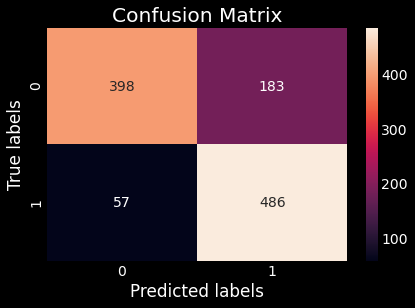

Confusion Matrix Done [ ✓ ]

Evaluating Model Performance [*]
Validation Accuracy is : 0.7864768683274022
Evaluating Model Performance [ ✓ ]

Applying K-Fold Cross Validation [*]
Accuracy: 80.16 %
Standard Deviation: 1.14 %
K-Fold Cross Validation [ ✓ ]

Complete [ ✓ ]

Time Elapsed :  0.22923922538757324 seconds 



In [101]:
params = {'C': 0.00026366508987303583, 'penalty': 'l2', 'solver': 'newton-cg'}

classifier =  Classification(predictor = 'lr',params=params, smote = 'y')
classifier.fit(features, labels)
result = classifier.result()
accuracy_scores[result['Classifier']] = result['Accuracy']


          
██╗░░░░░██╗░░░██╗░█████╗░██╗███████╗███████╗██████╗░░░░░░░███╗░░░███╗██╗░░░░░
██║░░░░░██║░░░██║██╔══██╗██║██╔════╝██╔════╝██╔══██╗░░░░░░████╗░████║██║░░░░░
██║░░░░░██║░░░██║██║░░╚═╝██║█████╗░░█████╗░░██████╔╝█████╗██╔████╔██║██║░░░░░
██║░░░░░██║░░░██║██║░░██╗██║██╔══╝░░██╔══╝░░██╔══██╗╚════╝██║╚██╔╝██║██║░░░░░
███████╗╚██████╔╝╚█████╔╝██║██║░░░░░███████╗██║░░██║░░░░░░██║░╚═╝░██║███████╗
╚══════╝░╚═════╝░░╚════╝░╚═╝╚═╝░░░░░╚══════╝╚═╝░░╚═╝░░░░░░╚═╝░░░░░╚═╝╚══════╝

Started LuciferML 

Checking if labels or features are categorical! [*]

Features are not categorical [ ✓ ]

Labels are not categorical [ ✓ ]

Checking for Categorical Variables Done [ ✓ ]

Checking for Sparse Matrix [*]

Applying SMOTE [*]

SMOTE Done [ ✓ ]

Splitting Data into Train and Validation Sets [*]

Splitting Done [ ✓ ]

Scaling Training and Test Sets [*]

Scaling Done [ ✓ ]

Training Stochastic Gradient Descent on Training Set [*]

Model Training Done [ ✓ ]

Predicting Data [*]

Data Prediction Done [ ✓

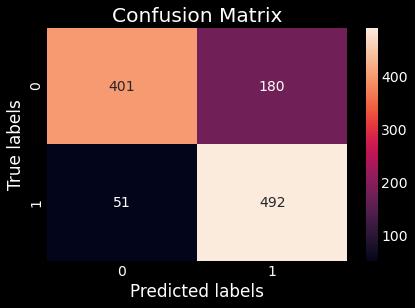

Confusion Matrix Done [ ✓ ]

Evaluating Model Performance [*]
Validation Accuracy is : 0.7944839857651246
Evaluating Model Performance [ ✓ ]

Applying K-Fold Cross Validation [*]
Accuracy: 80.99 %
Standard Deviation: 1.20 %
K-Fold Cross Validation [ ✓ ]

Complete [ ✓ ]

Time Elapsed :  0.2121291160583496 seconds 



In [102]:
params = {'alpha': 0.01, 'l1_ratio': 1.0, 'loss': 'hinge', 'penalty': 'l1'}

classifier =  Classification(predictor = 'sgd',params=params, smote = 'y')
classifier.fit(features, labels)
result = classifier.result()
accuracy_scores[result['Classifier']] = result['Accuracy']


          
██╗░░░░░██╗░░░██╗░█████╗░██╗███████╗███████╗██████╗░░░░░░░███╗░░░███╗██╗░░░░░
██║░░░░░██║░░░██║██╔══██╗██║██╔════╝██╔════╝██╔══██╗░░░░░░████╗░████║██║░░░░░
██║░░░░░██║░░░██║██║░░╚═╝██║█████╗░░█████╗░░██████╔╝█████╗██╔████╔██║██║░░░░░
██║░░░░░██║░░░██║██║░░██╗██║██╔══╝░░██╔══╝░░██╔══██╗╚════╝██║╚██╔╝██║██║░░░░░
███████╗╚██████╔╝╚█████╔╝██║██║░░░░░███████╗██║░░██║░░░░░░██║░╚═╝░██║███████╗
╚══════╝░╚═════╝░░╚════╝░╚═╝╚═╝░░░░░╚══════╝╚═╝░░╚═╝░░░░░░╚═╝░░░░░╚═╝╚══════╝

Started LuciferML 

Checking if labels or features are categorical! [*]

Features are not categorical [ ✓ ]

Labels are not categorical [ ✓ ]

Checking for Categorical Variables Done [ ✓ ]

Checking for Sparse Matrix [*]

Applying SMOTE [*]

SMOTE Done [ ✓ ]

Splitting Data into Train and Validation Sets [*]

Splitting Done [ ✓ ]

Scaling Training and Test Sets [*]

Scaling Done [ ✓ ]

Training Passive Aggressive on Training Set [*]

Model Training Done [ ✓ ]

Predicting Data [*]

Data Prediction Done [ ✓ ]

Makin

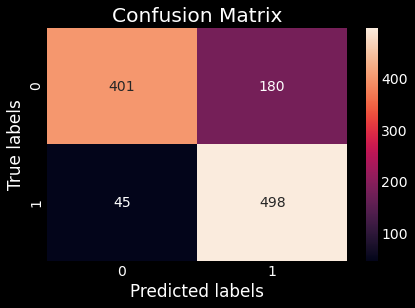

Confusion Matrix Done [ ✓ ]

Evaluating Model Performance [*]
Validation Accuracy is : 0.7998220640569395
Evaluating Model Performance [ ✓ ]

Applying K-Fold Cross Validation [*]
Accuracy: 81.08 %
Standard Deviation: 1.18 %
K-Fold Cross Validation [ ✓ ]

Complete [ ✓ ]

Time Elapsed :  0.18529820442199707 seconds 



In [103]:
params = {'C': 0.0018329807108324356, 'loss': 'hinge', 'validation_fraction': 0.5}

classifier =  Classification(predictor = 'pass',params=params, smote = 'y')
classifier.fit(features, labels)
result = classifier.result()
accuracy_scores[result['Classifier']] = result['Accuracy']



          
██╗░░░░░██╗░░░██╗░█████╗░██╗███████╗███████╗██████╗░░░░░░░███╗░░░███╗██╗░░░░░
██║░░░░░██║░░░██║██╔══██╗██║██╔════╝██╔════╝██╔══██╗░░░░░░████╗░████║██║░░░░░
██║░░░░░██║░░░██║██║░░╚═╝██║█████╗░░█████╗░░██████╔╝█████╗██╔████╔██║██║░░░░░
██║░░░░░██║░░░██║██║░░██╗██║██╔══╝░░██╔══╝░░██╔══██╗╚════╝██║╚██╔╝██║██║░░░░░
███████╗╚██████╔╝╚█████╔╝██║██║░░░░░███████╗██║░░██║░░░░░░██║░╚═╝░██║███████╗
╚══════╝░╚═════╝░░╚════╝░╚═╝╚═╝░░░░░╚══════╝╚═╝░░╚═╝░░░░░░╚═╝░░░░░╚═╝╚══════╝

Started LuciferML 

Checking if labels or features are categorical! [*]

Features are not categorical [ ✓ ]

Labels are not categorical [ ✓ ]

Checking for Categorical Variables Done [ ✓ ]

Checking for Sparse Matrix [*]

Applying SMOTE [*]

SMOTE Done [ ✓ ]

Splitting Data into Train and Validation Sets [*]

Splitting Done [ ✓ ]

Scaling Training and Test Sets [*]

Scaling Done [ ✓ ]

Training Support Vector Machine on Training Set [*]

Model Training Done [ ✓ ]

Predicting Data [*]

Data Prediction Done [ ✓ ]

M

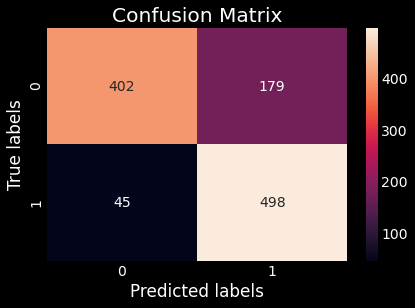

Confusion Matrix Done [ ✓ ]

Evaluating Model Performance [*]
Validation Accuracy is : 0.800711743772242
Evaluating Model Performance [ ✓ ]

Applying K-Fold Cross Validation [*]
Accuracy: 81.14 %
Standard Deviation: 1.01 %
K-Fold Cross Validation [ ✓ ]

Complete [ ✓ ]

Time Elapsed :  4.089964866638184 seconds 



In [104]:
params = {'C': .75, 'gamma': 0.2,
          'kernel': 'linear', 'random_state': 42}
classifier =  Classification(predictor = 'svm',params=params, smote = 'y')
classifier.fit(features, labels)
result = classifier.result()
accuracy_scores[result['Classifier']] = result['Accuracy']


          
██╗░░░░░██╗░░░██╗░█████╗░██╗███████╗███████╗██████╗░░░░░░░███╗░░░███╗██╗░░░░░
██║░░░░░██║░░░██║██╔══██╗██║██╔════╝██╔════╝██╔══██╗░░░░░░████╗░████║██║░░░░░
██║░░░░░██║░░░██║██║░░╚═╝██║█████╗░░█████╗░░██████╔╝█████╗██╔████╔██║██║░░░░░
██║░░░░░██║░░░██║██║░░██╗██║██╔══╝░░██╔══╝░░██╔══██╗╚════╝██║╚██╔╝██║██║░░░░░
███████╗╚██████╔╝╚█████╔╝██║██║░░░░░███████╗██║░░██║░░░░░░██║░╚═╝░██║███████╗
╚══════╝░╚═════╝░░╚════╝░╚═╝╚═╝░░░░░╚══════╝╚═╝░░╚═╝░░░░░░╚═╝░░░░░╚═╝╚══════╝

Started LuciferML 

Checking if labels or features are categorical! [*]

Features are not categorical [ ✓ ]

Labels are not categorical [ ✓ ]

Checking for Categorical Variables Done [ ✓ ]

Checking for Sparse Matrix [*]

Applying SMOTE [*]

SMOTE Done [ ✓ ]

Splitting Data into Train and Validation Sets [*]

Splitting Done [ ✓ ]

Scaling Training and Test Sets [*]

Scaling Done [ ✓ ]

Training K-Nearest Neighbours on Training Set [*]

Model Training Done [ ✓ ]

Predicting Data [*]

Data Prediction Done [ ✓ ]

Mak

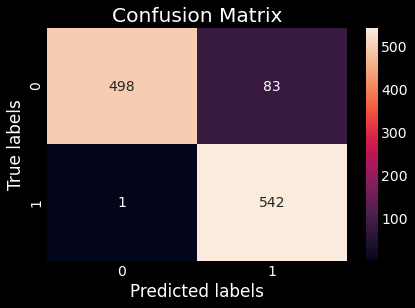

Confusion Matrix Done [ ✓ ]

Evaluating Model Performance [*]
Validation Accuracy is : 0.9252669039145908
Evaluating Model Performance [ ✓ ]

Applying K-Fold Cross Validation [*]
Accuracy: 91.90 %
Standard Deviation: 0.70 %
K-Fold Cross Validation [ ✓ ]

Complete [ ✓ ]

Time Elapsed :  0.4005289077758789 seconds 



In [105]:
params = {'algorithm': 'kd_tree', 'n_jobs': 1, 'n_neighbors': 1, 'weights': 'uniform'}
classifier =  Classification(predictor = 'knn',params=params, smote = 'y')
classifier.fit(features, labels)
result = classifier.result()
accuracy_scores[result['Classifier']] = result['Accuracy']


          
██╗░░░░░██╗░░░██╗░█████╗░██╗███████╗███████╗██████╗░░░░░░░███╗░░░███╗██╗░░░░░
██║░░░░░██║░░░██║██╔══██╗██║██╔════╝██╔════╝██╔══██╗░░░░░░████╗░████║██║░░░░░
██║░░░░░██║░░░██║██║░░╚═╝██║█████╗░░█████╗░░██████╔╝█████╗██╔████╔██║██║░░░░░
██║░░░░░██║░░░██║██║░░██╗██║██╔══╝░░██╔══╝░░██╔══██╗╚════╝██║╚██╔╝██║██║░░░░░
███████╗╚██████╔╝╚█████╔╝██║██║░░░░░███████╗██║░░██║░░░░░░██║░╚═╝░██║███████╗
╚══════╝░╚═════╝░░╚════╝░╚═╝╚═╝░░░░░╚══════╝╚═╝░░╚═╝░░░░░░╚═╝░░░░░╚═╝╚══════╝

Started LuciferML 

Checking if labels or features are categorical! [*]

Features are not categorical [ ✓ ]

Labels are not categorical [ ✓ ]

Checking for Categorical Variables Done [ ✓ ]

Checking for Sparse Matrix [*]

Applying SMOTE [*]

SMOTE Done [ ✓ ]

Splitting Data into Train and Validation Sets [*]

Splitting Done [ ✓ ]

Scaling Training and Test Sets [*]

Scaling Done [ ✓ ]

Training Decision Tree Classifier on Training Set [*]

Model Training Done [ ✓ ]

Predicting Data [*]

Data Prediction Done [ ✓ ]


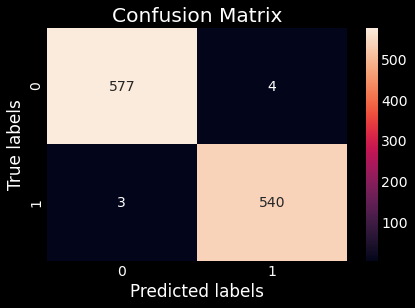

Confusion Matrix Done [ ✓ ]

Evaluating Model Performance [*]
Validation Accuracy is : 0.9937722419928826
Evaluating Model Performance [ ✓ ]

Applying K-Fold Cross Validation [*]
Accuracy: 99.27 %
Standard Deviation: 0.55 %
K-Fold Cross Validation [ ✓ ]

Complete [ ✓ ]

Time Elapsed :  0.3047370910644531 seconds 



In [106]:
params = {'criterion': 'entropy', 'max_depth': 30, 'max_features': 'sqrt', 'splitter': 'best', 'random_state': 42}
classifier =  Classification(predictor = 'dt',params=params, smote = 'y')
classifier.fit(features, labels)
result = classifier.result()
accuracy_scores[result['Classifier']] = result['Accuracy']


          
██╗░░░░░██╗░░░██╗░█████╗░██╗███████╗███████╗██████╗░░░░░░░███╗░░░███╗██╗░░░░░
██║░░░░░██║░░░██║██╔══██╗██║██╔════╝██╔════╝██╔══██╗░░░░░░████╗░████║██║░░░░░
██║░░░░░██║░░░██║██║░░╚═╝██║█████╗░░█████╗░░██████╔╝█████╗██╔████╔██║██║░░░░░
██║░░░░░██║░░░██║██║░░██╗██║██╔══╝░░██╔══╝░░██╔══██╗╚════╝██║╚██╔╝██║██║░░░░░
███████╗╚██████╔╝╚█████╔╝██║██║░░░░░███████╗██║░░██║░░░░░░██║░╚═╝░██║███████╗
╚══════╝░╚═════╝░░╚════╝░╚═╝╚═╝░░░░░╚══════╝╚═╝░░╚═╝░░░░░░╚═╝░░░░░╚═╝╚══════╝

Started LuciferML 

Checking if labels or features are categorical! [*]

Features are not categorical [ ✓ ]

Labels are not categorical [ ✓ ]

Checking for Categorical Variables Done [ ✓ ]

Checking for Sparse Matrix [*]

Applying SMOTE [*]

SMOTE Done [ ✓ ]

Splitting Data into Train and Validation Sets [*]

Splitting Done [ ✓ ]

Scaling Training and Test Sets [*]

Scaling Done [ ✓ ]

Training Naive Bayes Classifier on Training Set [*]

Model Training Done [ ✓ ]

Predicting Data [*]

Data Prediction Done [ ✓ ]

M

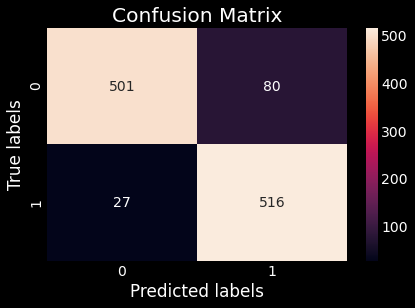

Confusion Matrix Done [ ✓ ]

Evaluating Model Performance [*]
Validation Accuracy is : 0.9048042704626335
Evaluating Model Performance [ ✓ ]

Applying K-Fold Cross Validation [*]
Accuracy: 91.87 %
Standard Deviation: 0.92 %
K-Fold Cross Validation [ ✓ ]

Complete [ ✓ ]

Time Elapsed :  0.17007112503051758 seconds 



In [107]:
classifier =  Classification(predictor = 'nb', smote = 'y')
classifier.fit(features, labels)
result = classifier.result()
accuracy_scores[result['Classifier']] = result['Accuracy']


          
██╗░░░░░██╗░░░██╗░█████╗░██╗███████╗███████╗██████╗░░░░░░░███╗░░░███╗██╗░░░░░
██║░░░░░██║░░░██║██╔══██╗██║██╔════╝██╔════╝██╔══██╗░░░░░░████╗░████║██║░░░░░
██║░░░░░██║░░░██║██║░░╚═╝██║█████╗░░█████╗░░██████╔╝█████╗██╔████╔██║██║░░░░░
██║░░░░░██║░░░██║██║░░██╗██║██╔══╝░░██╔══╝░░██╔══██╗╚════╝██║╚██╔╝██║██║░░░░░
███████╗╚██████╔╝╚█████╔╝██║██║░░░░░███████╗██║░░██║░░░░░░██║░╚═╝░██║███████╗
╚══════╝░╚═════╝░░╚════╝░╚═╝╚═╝░░░░░╚══════╝╚═╝░░╚═╝░░░░░░╚═╝░░░░░╚═╝╚══════╝

Started LuciferML 

Checking if labels or features are categorical! [*]

Features are not categorical [ ✓ ]

Labels are not categorical [ ✓ ]

Checking for Categorical Variables Done [ ✓ ]

Checking for Sparse Matrix [*]

Applying SMOTE [*]

SMOTE Done [ ✓ ]

Splitting Data into Train and Validation Sets [*]

Splitting Done [ ✓ ]

Scaling Training and Test Sets [*]

Scaling Done [ ✓ ]

Training LightGBM on Training Set [*]

Model Training Done [ ✓ ]

Predicting Data [*]

Data Prediction Done [ ✓ ]

Making Confusio

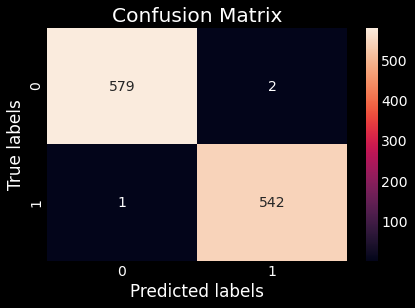

Confusion Matrix Done [ ✓ ]

Evaluating Model Performance [*]
Validation Accuracy is : 0.9973309608540926
Evaluating Model Performance [ ✓ ]

Applying K-Fold Cross Validation [*]
Accuracy: 99.87 %
Standard Deviation: 0.11 %
K-Fold Cross Validation [ ✓ ]

Complete [ ✓ ]

Time Elapsed :  1.7698237895965576 seconds 



In [108]:
params = {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 1000, 'num_leaves': 16}

classifier =  Classification(predictor = 'lgbm',params=params, smote = 'y')
classifier.fit(features, labels)
result = classifier.result()
accuracy_scores[result['Classifier']] = result['Accuracy']


          
██╗░░░░░██╗░░░██╗░█████╗░██╗███████╗███████╗██████╗░░░░░░░███╗░░░███╗██╗░░░░░
██║░░░░░██║░░░██║██╔══██╗██║██╔════╝██╔════╝██╔══██╗░░░░░░████╗░████║██║░░░░░
██║░░░░░██║░░░██║██║░░╚═╝██║█████╗░░█████╗░░██████╔╝█████╗██╔████╔██║██║░░░░░
██║░░░░░██║░░░██║██║░░██╗██║██╔══╝░░██╔══╝░░██╔══██╗╚════╝██║╚██╔╝██║██║░░░░░
███████╗╚██████╔╝╚█████╔╝██║██║░░░░░███████╗██║░░██║░░░░░░██║░╚═╝░██║███████╗
╚══════╝░╚═════╝░░╚════╝░╚═╝╚═╝░░░░░╚══════╝╚═╝░░╚═╝░░░░░░╚═╝░░░░░╚═╝╚══════╝

Started LuciferML 

Checking if labels or features are categorical! [*]

Features are not categorical [ ✓ ]

Labels are not categorical [ ✓ ]

Checking for Categorical Variables Done [ ✓ ]

Checking for Sparse Matrix [*]

Applying SMOTE [*]

SMOTE Done [ ✓ ]

Splitting Data into Train and Validation Sets [*]

Splitting Done [ ✓ ]

Scaling Training and Test Sets [*]

Scaling Done [ ✓ ]

Training Bagging Classifier on Training Set [*]

Model Training Done [ ✓ ]

Predicting Data [*]

Data Prediction Done [ ✓ ]

Makin

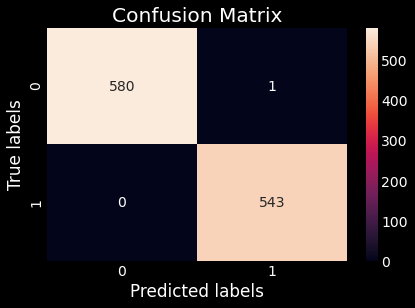

Confusion Matrix Done [ ✓ ]

Evaluating Model Performance [*]
Validation Accuracy is : 0.9991103202846975
Evaluating Model Performance [ ✓ ]

Applying K-Fold Cross Validation [*]
Accuracy: 99.93 %
Standard Deviation: 0.14 %
K-Fold Cross Validation [ ✓ ]

Complete [ ✓ ]

Time Elapsed :  26.351415872573853 seconds 



In [109]:
params = {'max_features': 0.8, 'max_samples': 0.8, 'n_estimators': 200}

classifier =  Classification(predictor = 'bag',params=params, smote = 'y')
classifier.fit(features, labels)
result = classifier.result()
accuracy_scores[result['Classifier']] = result['Accuracy']

In [110]:
maxKey = max(accuracy_scores, key=lambda x: accuracy_scores[x])
print('The model with highest K-Fold Validation Accuracy score is  {0} with an accuracy of  {1:.2f}'.format(
    maxKey, accuracy_scores[maxKey]))

The model with highest K-Fold Validation Accuracy score is  Bagging Classifier with an accuracy of  99.93


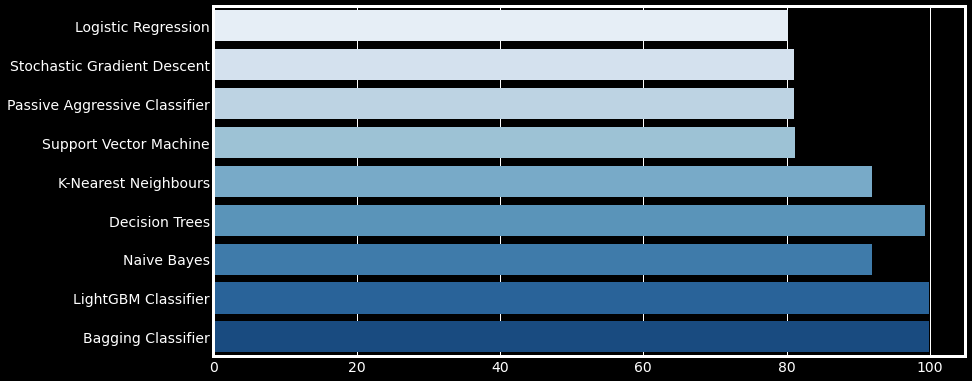

In [115]:
plt.figure(figsize=(12, 6))
model_accuracies = list(accuracy_scores.values())
model_names = list(accuracy_scores.keys())
sns.barplot(x=model_accuracies, y=model_names, palette='Blues');


In [56]:
from pycaret.classification import *

In [225]:

clf = setup(df1, target = "Potability", silent = True,fix_imbalance = False,normalize = False,train_size = 0.7, session_id = 786)




AttributeError: 'Simple_Imputer' object has no attribute 'fill_value_categorical'

In [226]:
compare_models() 

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=-1,
              num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=786, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='auto',
              use_label_encoder=True, validate_parameters=1, verbosity=0)

In [66]:
compare_models()

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=-1,
              num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=786, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='auto',
              use_label_encoder=True, validate_parameters=1, verbosity=0)

In [233]:
model = create_model("ada", cross_validation=True, verbose=True)
predict = predict_model(model,probability_threshold=0.8543000000000001, data=df1)

predict.head()




ph  Hardness    Solids  Chloramines   Sulfate  Conductivity  \
0  2.084025  5.327344  9.942339     2.116281  5.912195      6.337372   
1  1.550978  4.870782  9.832585     2.032775  5.811361      6.386686   
2  2.208178  5.417150  9.899005     2.329800  5.811361      6.039317   
3  2.231816  5.372373  9.999680     2.203795  5.880215      5.897886   
4  2.311765  5.204564  9.797015     2.021097  5.740229      5.989990   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  Label   Score  
0        2.431838         4.477234   1.377035           0      0  1.0000  
1        2.783777         4.048808   1.704867           0      0  1.0000  
2        2.883047         4.210943   1.400181           1      1  0.9579  
3        2.967154         4.618498   1.727891           0      0  0.9999  
4        2.530380         3.496447   1.624341           0      0  0.9622

In [232]:
optimize_threshold(model, true_negative = 1500, false_negative = -5000)

Optimized Probability Threshold: 0.8543000000000001 | Optimized Cost Function: 1243000


0.8543000000000001

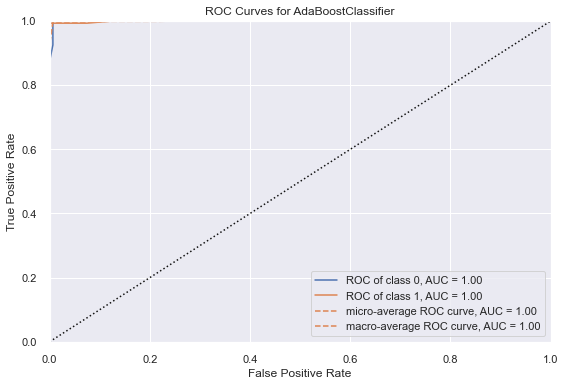

In [234]:
plot_model(model, plot = 'auc')

In [235]:
evaluate_model(model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

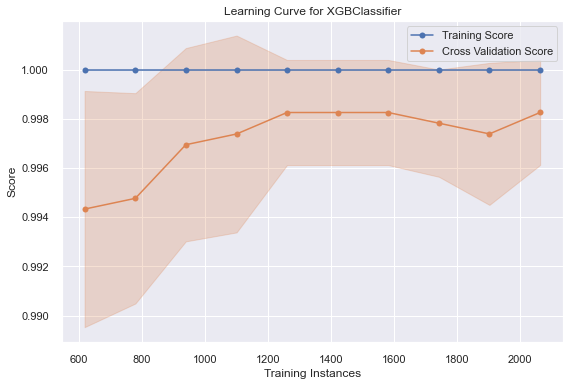

In [228]:
plot_model(estimator = model, plot = 'learning')

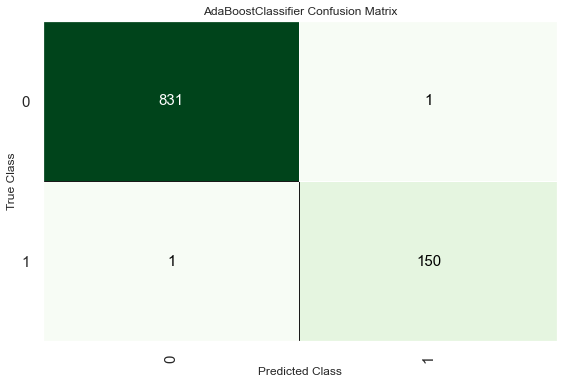

In [237]:
plot_model(model, plot = 'confusion_matrix')

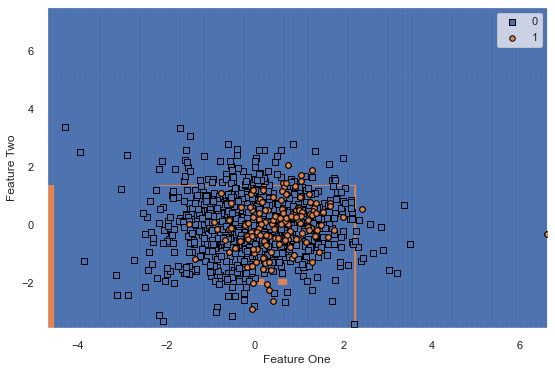

In [238]:
plot_model(model, plot = 'boundary')

In [113]:
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler

In [108]:
df12

ph  Hardness     Solids  Chloramines   Sulfate  Conductivity  \
0     2.084025  5.327344   9.942339     2.116281  5.912195      6.337372   
1     1.550978  4.870782   9.832585     2.032775  5.811361      6.386686   
2     2.208178  5.417150   9.899005     2.329800  5.811361      6.039317   
3     2.231816  5.372373   9.999680     2.203795  5.880215      5.897886   
4     2.311765  5.204564   9.797015     2.021097  5.740229      5.989990   
...        ...       ...        ...          ...       ...           ...   
3271  1.734854  5.271366  10.770210     2.100057  5.888735      6.268005   
3272  2.175758  5.270706   9.760241     2.204019  5.811361      5.974953   
3273  2.343680  5.174808  10.408996     2.122289  5.811361      6.070841   
3274  1.812667  5.445028   9.391400     1.988334  5.811361      6.001126   
3275  2.183201  5.278636   9.764523     2.141160  5.811361      5.794414   

      Organic_carbon  Trihalomethanes  Turbidity  Potability  
0           2.431838         4.477234   1.377035           0  
1           2.783777         4.048808   1.704867           0  
2           2.883047         4.210943   1.400181           1  
3           2.967154         4.618498   1.727891           0  
4           2.530380         3.496447   1.624341           0  
...              ...              ...        ...         ...  
3271        2.700987         4.214904   1.693011           0  
3272        3.039903         4.213941   1.334539           1  
3273        2.488157         4.260500   1.458353           0  
3274        2.498887         4.362948   1.741984           0  
3275        2.841436         4.378250   1.196691           1  

[3276 rows x 10 columns]

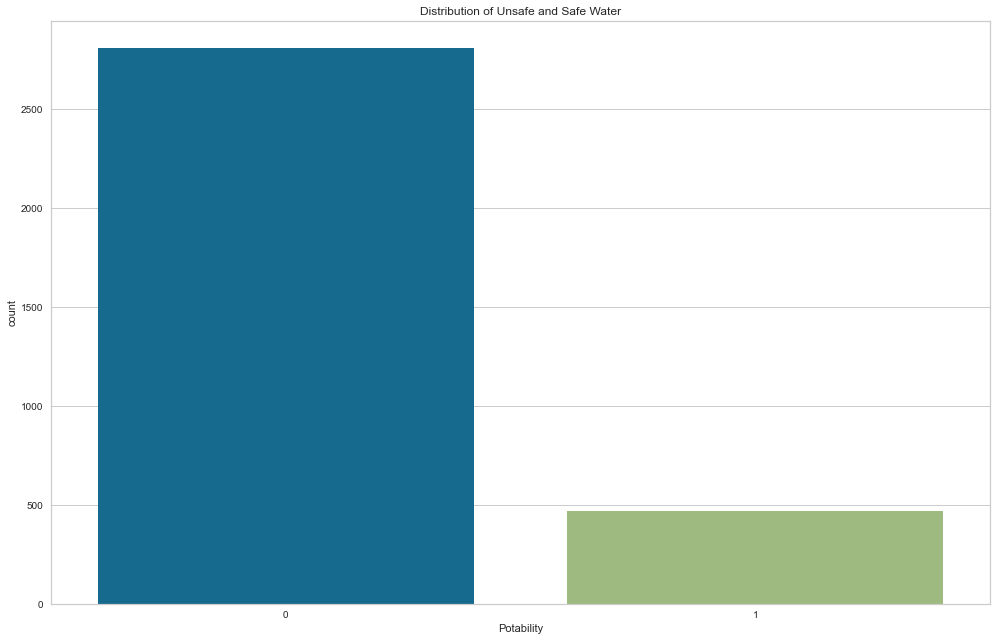

In [109]:
plt.figure(figsize=(15, 10))
sns.countplot(df12.Potability)
plt.title("Distribution of Unsafe and Safe Water")
plt.show()

In [110]:
X = df12.drop('Potability',axis=1).values
y = df12['Potability'].values

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=40)#train_size=0.7
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.15, random_state=3)


In [114]:
scaler = RobustScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [127]:
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (2784, 9) (2784,)
Test set: (656, 9) (656,)


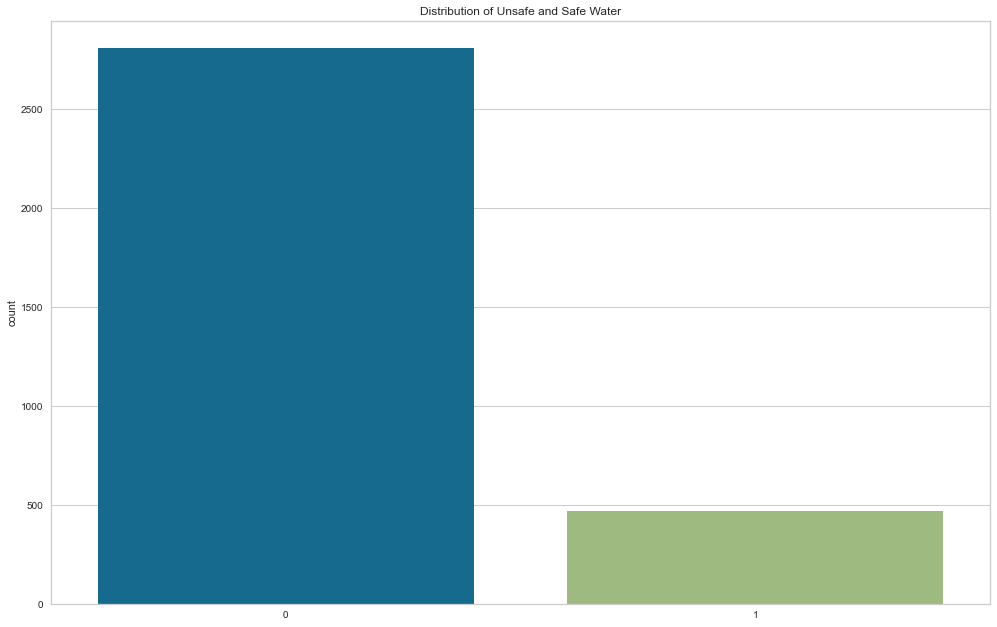

In [117]:
plt.figure(figsize=(15, 10))
sns.countplot(y)
plt.title("Distribution of Unsafe and Safe Water")
plt.show()

In [124]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

from sklearn.ensemble import RandomForestClassifier

In [128]:
from sklearn.neighbors import KNeighborsClassifier

In [135]:
k = 1
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [136]:
yhat = neigh.predict(X_test)
#yhat[0:100]

In [150]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Train-v set Accuracy: ", metrics.accuracy_score(y_val, neigh.predict(X_val)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.9292385057471264
Train-v set Accuracy:  0.8495934959349594
Test set Accuracy:  0.9344512195121951


In [155]:
Ks = 7
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.97560976, 0.93597561, 0.94359756, 0.93902439, 0.9375    ,
       0.93445122])

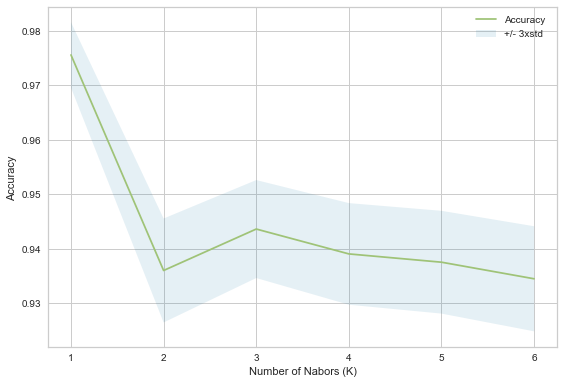

In [156]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [140]:
df12.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [165]:
# examine the class distribution of the testing set (using a Pandas Series method)
pd.Series(y_test).value_counts()

0    569
1     87
dtype: int64

In [166]:
pd.Series(y_test).mean()

0.1326219512195122

In [167]:
1 - pd.Series(y_test).mean()

0.8673780487804879

In [168]:
max(pd.Series(y_test).mean(), 1 - pd.Series(y_test).mean())

0.8673780487804879

In [170]:
pd.Series(y_test).value_counts().head(1) / len(y_test)

0    0.867378
dtype: float64

In [175]:
from sklearn.metrics import confusion_matrix

In [178]:
confusion_matrix(y_test, yhat)

array([[559,  10],
       [ 33,  54]])

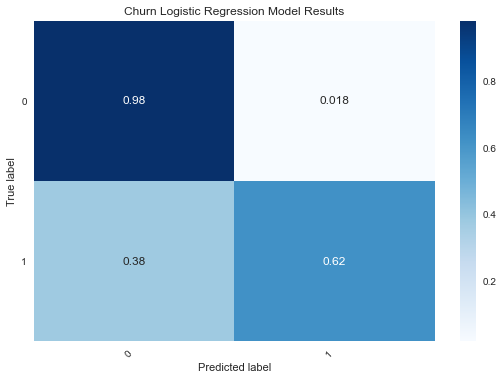

In [182]:
import matplotlib.pyplot as plt

import seaborn as sns

plt.figure()

heatmap = sns.heatmap(df_cm, annot=True, cmap="Blues")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')

heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')


plt.ylabel('True label')

plt.xlabel('Predicted label')

plt.title('Churn Logistic Regression Model Results')
df_cm = df_cm.astype('float') / df_cm.sum(axis=1)[:, np.newaxis]  

plt.show()    

In [183]:
 from sklearn.metrics import roc_curve, roc_auc_score

In [185]:
y_pred_proba = neigh.predict_proba(np.array(X_test))[:,1]

In [186]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

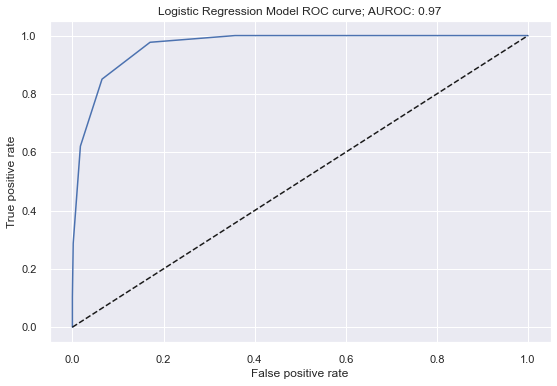

In [187]:
sns.set()

plt.plot(fpr, tpr)

plt.plot(fpr, fpr, linestyle = '--', color = 'k')

plt.xlabel('False positive rate')

plt.ylabel('True positive rate')

AUROC = np.round(roc_auc_score(y_test, y_pred_proba), 2)

plt.title(f'Logistic Regression Model ROC curve; AUROC: {AUROC}');

plt.show()


In [200]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
max_depth=1, random_state=0).fit(X_train, y_train)
yY=clf.predict(X_test)



In [205]:
clf.score(X_test, y_test)


1.0

In [207]:
fpr, tpr, thresholds = roc_curve(y_test, yY)

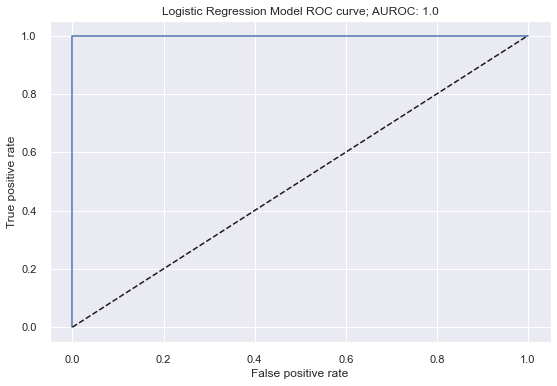

In [208]:

plt.plot(fpr, tpr)

plt.plot(fpr, fpr, linestyle = '--', color = 'k')

plt.xlabel('False positive rate')

plt.ylabel('True positive rate')

AUROC = np.round(roc_auc_score(y_test, yY), 2)

plt.title(f'Logistic Regression Model ROC curve; AUROC: {AUROC}');

plt.show()



In [212]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, clf.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))


The mean squared error (MSE) on test set: 0.0000


In [217]:
from sklearn.model_selection import train_test_split
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

#Random Forest

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)
rf.fit(X_train, y_train);
predictions = rf.predict(X_test)
cm = sklearn.metrics.confusion_matrix(y_test,predictions)
print(cm)



[[569   0]
 [  0  87]]


In [219]:
#Decision Tree

from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
cm = sklearn.metrics.confusion_matrix(y_test,predictions)
cm = sklearn.metrics.confusion_matrix(y_test,predictions)
print(cm)

[[569   0]
 [  0  87]]


In [116]:
from tpot import TPOTClassifier
import timeit
import sklearn.metrics
# create train and test sets

#X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, train_size=0.75, test_size=0.25, random_state=34)
tpot = TPOTClassifier(verbosity=3, 
                      scoring="balanced_accuracy", 
                      random_state=23, 
                      periodic_checkpoint_folder="tpot_mnst1.txt", 
                      n_jobs=-1, 
                      generations=10, 
                      population_size=100)
# run three iterations and time them
for x in range(3):
    start_time = timeit.default_timer()
    tpot.fit(X_train, y_train)
    elapsed = timeit.default_timer() - start_time
    times.append(elapsed)
    winning_pipes.append(tpot.fitted_pipeline_)
    scores.append(tpot.score(X_test, y_test))
    tpot.export('tpot_mnist_pipeline.py')
times = [time/60 for time in times]
print('Times:', times)
print('Scores:', scores)   
print('Winning pipelines:', winning_pipes)

32 operators have been imported by TPOT.


Optimization Progress:   0%|          | 0/1100 [00:00<?, ?pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required..
_pre_test decorator: _random_mutation_operator: num_test=0 Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty..
_pre_test decorator: _random_mutation_operator: num_test=0 Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty..
_pre_test decorator: _random_mutation_operator: num_test=0 Negative values in data passed to MultinomialNB (input X).
_pre_test decorator: _random_mutation_operator: num_test=0 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required..
_pre_test decorator: _random_mutation_operator: num_test=0 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required..
_pre_test decorator: _random_mutation_operator: num_test=1 Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty..
_pre_test decorator: _random_mutation_operator: num_test=2 Found array with

NameError: name 'times' is not defined

In [258]:
#pip install tpot


SyntaxError: invalid syntax (<ipython-input-258-c73472f969d4>, line 2)

In [260]:
pip install hyperopt

  Using cached hyperopt-0.2.5-py2.py3-none-any.whl (965 kB)
Note: you may need to restart the kernel to use updated packages.


In [249]:
tpot = TPOTClassifier(generations = 5, population_size = 20, verbosity = 2)

tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))
tpot.export('tpot_mnist_pipeline.py')

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.999281867145422

Generation 2 - Current best internal CV score: 0.999281867145422

Generation 3 - Current best internal CV score: 0.999281867145422

Generation 4 - Current best internal CV score: 0.999281867145422

Generation 5 - Current best internal CV score: 0.999281867145422

Best pipeline: RandomForestClassifier(input_matrix, bootstrap=False, criterion=gini, max_features=0.7000000000000001, min_samples_leaf=17, min_samples_split=14, n_estimators=100)
1.0


In [261]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials

In [262]:
from sklearn.metrics import accuracy_score
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
import numpy as np
def objective(space):
    # Instantiate the classifier
    clf = XGBClassifier(n_estimators =1000,colsample_bytree=space['colsample_bytree'],
                           learning_rate = .3,
                            max_depth = int(space['max_depth']),
                            min_child_weight = space['min_child_weight'],
                            subsample = space['subsample'],
                            gamma = space['gamma'],
                           reg_lambda = space['reg_lambda'])
    
    eval_set  = [( X_train, y_train), ( X_test, y_test)]
    
    # Fit the classsifier
    clf.fit(X_train, y_train,
            eval_set=eval_set, early_stopping_rounds=10,verbose=False)
    
    # Predict on Cross Validation data
    pred = clf.predict(X_test)
    
    # Calculate our Metric - accuracy
    accuracy = accuracy_score(y_test, pred>0.5)

    # return needs to be in this below format. We use negative of accuracy since we want to maximize it.
    return {'loss': -accuracy, 'status': STATUS_OK }

In [263]:
space ={'max_depth': hp.quniform("x_max_depth", 4, 16, 1),
        'min_child_weight': hp.quniform ('x_min_child', 1, 10, 1),
        'subsample': hp.uniform ('x_subsample', 0.7, 1),
        'gamma' : hp.uniform ('x_gamma', 0.1,0.5),
        'colsample_bytree' : hp.uniform ('x_colsample_bytree', 0.7,1),
        'reg_lambda' : hp.uniform ('x_reg_lambda', 0,1)
    }

In [264]:
trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=100,
            trials=trials)
print(best)

100%|██████████| 100/100 [00:11<00:00,  8.87trial/s, best loss: -1.0]
{'x_colsample_bytree': 0.9371515221529769, 'x_gamma': 0.25061551267211135, 'x_max_depth': 12.0, 'x_min_child': 3.0, 'x_reg_lambda': 0.2372571611205001, 'x_subsample': 0.9961236487143255}


In [265]:
from sklearn.metrics import classification_report,accuracy_score

clf = XGBClassifier(x_colsample_bytree= 0.8743861143035889, x_gamma= 0.15403994099351054, 
                         x_max_depth= 7.0, x_min_child =5.0, x_reg_lambda= 0.015889530822374764, 
                         x_subsample= 0.7716293823039047)

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

print('Confusion Matrix :\n',pd.crosstab(y_test,y_pred))

print('Accuracy Socre :',accuracy_score(y_test,y_pred))

print('\nClassification Report :\n',classification_report(y_test,y_pred))

Confusion Matrix :
 col_0    0   1
row_0         
0      569   0
1        0  87
Accuracy Socre : 1.0

Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       569
           1       1.00      1.00      1.00        87

    accuracy                           1.00       656
   macro avg       1.00      1.00      1.00       656
weighted avg       1.00      1.00      1.00       656



In [28]:
df00 = pd.read_csv('water1.csv')

In [29]:
df00.drop(['Unnamed: 0'], axis=1 , inplace=True) 

In [30]:
df00

ph    Hardness        Solids  Chloramines     Sulfate  \
0     7.036752  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246  333.073546   
2     8.099124  224.236259  19909.541732     9.275884  333.073546   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362  333.073546   
3273  9.419510  175.762646  33155.578218     7.350233  333.073546   
3274  5.126763  230.603758  11983.869376     6.303357  333.073546   
3275  7.874671  195.102299  17404.177061     7.509306  333.073546   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.885359       15.180013        56.329076   4.500656           0  
2       418.606213       16.868637        66.420093   3.055934           0  
3       363.266516       18.436524       100.341674   4.628771           0  
4       398.410813       11.558279        31.997993   4.075075           0  
...            ...             ...              ...        ...         ...  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225        66.622485   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1  

[3276 rows x 10 columns]

In [31]:

X1 = df00.drop('Potability',axis=1).values
y1 = df00['Potability'].values

In [32]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size = 0.2, random_state=40)#train_size=0.7
X_train, X_val, y_train, y_val = train_test_split(X1, y1, test_size=.15, random_state=3)



In [304]:
from sklearn.metrics import accuracy_score
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
import numpy as np
def objective(space):
    # Instantiate the classifier
    clf = XGBClassifier(n_estimators =1000,colsample_bytree=space['colsample_bytree'],
                           learning_rate = .3,
                            max_depth = int(space['max_depth']),
                            min_child_weight = space['min_child_weight'],
                            subsample = space['subsample'],
                            gamma = space['gamma'],
                           reg_lambda = space['reg_lambda'])
    
    eval_set  = [( X1_train, y1_train), ( X1_test, y1_test)]
    
    # Fit the classsifier
    clf.fit(X_train, y_train,
            eval_set=eval_set, early_stopping_rounds=10,verbose=False)
    
    # Predict on Cross Validation data
    pred = clf.predict(X_test)
    
    # Calculate our Metric - accuracy
    accuracy = accuracy_score(y_test, pred>0.5)

    # return needs to be in this below format. We use negative of accuracy since we want to maximize it.
    return {'loss': -accuracy, 'status': STATUS_OK }

In [305]:
space ={'max_depth': hp.quniform("x_max_depth", 4, 16, 1),
        'min_child_weight': hp.quniform ('x_min_child', 1, 10, 1),
        'subsample': hp.uniform ('x_subsample', 0.7, 1),
        'gamma' : hp.uniform ('x_gamma', 0.1,0.5),
        'colsample_bytree' : hp.uniform ('x_colsample_bytree', 0.7,1),
        'reg_lambda' : hp.uniform ('x_reg_lambda', 0,1)
    }

In [306]:
trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=100,
            trials=trials)
print(best)

100%|██████████| 100/100 [01:26<00:00,  1.16trial/s, best loss: -0.9603658536585366]
{'x_colsample_bytree': 0.7687296967191029, 'x_gamma': 0.30050397631662357, 'x_max_depth': 15.0, 'x_min_child': 4.0, 'x_reg_lambda': 0.8031527685691343, 'x_subsample': 0.7596273528985398}


In [295]:
from sklearn.metrics import classification_report,accuracy_score

clf = XGBClassifier(x_colsample_bytree= 0.899305909353489, x_gamma= 0.28593265317060146, 
                         x_max_depth= 8.0, x_min_child =7.0, x_reg_lambda=0.0017044598241172382, 
                         x_subsample= 0.9947251364149797)
clf.fit(X1_train,y1_train)

y_pred = clf.predict(X1_test)

print('Confusion Matrix :\n',pd.crosstab(y1_test,y_pred))

print('Accuracy Socre :',accuracy_score(y1_test,y_pred))

print('\nClassification Report :\n',classification_report(y1_test,y_pred))

Confusion Matrix :
 col_0    0    1
row_0          
0      383   12
1       24  237
Accuracy Socre : 0.9451219512195121

Classification Report :
               precision    recall  f1-score   support

           0       0.94      0.97      0.96       395
           1       0.95      0.91      0.93       261

    accuracy                           0.95       656
   macro avg       0.95      0.94      0.94       656
weighted avg       0.95      0.95      0.94       656



In [308]:
from sklearn.metrics import classification_report,accuracy_score

clf = XGBClassifier(x_colsample_bytree= 0.7687296967191029, x_gamma= 0.30050397631662357, 
                         x_max_depth= 15.0, x_min_child =4.0, x_reg_lambda=  0.8031527685691343, 
                         x_subsample= 0.7596273528985398)

clf.fit(X1_train,y1_train)

y_pred = clf.predict(X1_test)

print('Confusion Matrix :\n',pd.crosstab(y1_test,y_pred))

print('Accuracy Socre :',accuracy_score(y1_test,y_pred))

print('\nClassification Report :\n',classification_report(y1_test,y_pred))

Confusion Matrix :
 col_0    0    1
row_0          
0      314   81
1      160  101
Accuracy Socre : 0.6326219512195121

Classification Report :
               precision    recall  f1-score   support

           0       0.66      0.79      0.72       395
           1       0.55      0.39      0.46       261

    accuracy                           0.63       656
   macro avg       0.61      0.59      0.59       656
weighted avg       0.62      0.63      0.62       656



In [317]:
from tpot import TPOTClassifier
from tpot import TPOTRegressor
from sklearn.metrics import roc_auc_score

# Instantiate TPOTClassifier
tpot =  TPOTClassifier(
    generations=5,
    population_size=20,
    verbosity=2,
    scoring='roc_auc',
    random_state=42,
    disable_update_check=True,
    config_dict='TPOT light'
)
tpot.fit(X1_train, y1_train)

# AUC score for tpot model
tpot_auc_score = roc_auc_score(y_test, tpot.predict_proba(X_test)[:, 1])
print(f'\nAUC score: {tpot_auc_score:.4f}')

# Print best pipeline steps
print('\nBest pipeline steps:', end='\n')
for idx, (name, transform) in enumerate(tpot.fitted_pipeline_.steps, start=1):
    # Print idx and transform
    print(f'{idx}.{transform}')

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.5940757095216431

Generation 2 - Current best internal CV score: 0.602364493301752

Generation 3 - Current best internal CV score: 0.602364493301752

Generation 4 - Current best internal CV score: 0.6393559516136458

Generation 5 - Current best internal CV score: 0.6393559516136458

Best pipeline: DecisionTreeClassifier(KNeighborsClassifier(RobustScaler(input_matrix), n_neighbors=34, p=2, weights=uniform), criterion=gini, max_depth=10, min_samples_leaf=19, min_samples_split=15)

AUC score: 0.6134

Best pipeline steps:
1.RobustScaler(copy=True, quantile_range=(25.0, 75.0), unit_variance=False,
             with_centering=True, with_scaling=True)
2.StackingEstimator(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                                 metric='minkowski',
                                                 metric_params=None,
                                                 n_jobs=None, n_neighbors=34

In [22]:
from xgboost import XGBClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold

In [25]:
xgbc = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1,
              monotone_constraints='()', n_estimators=100, n_jobs=-1,
              num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=786, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='auto',
              use_label_encoder=True, validate_parameters=1, verbosity=0)

In [33]:
xgbc.fit(X1_train, y1_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=-1,
              num_parallel_tree=1, predictor='auto', random_state=786,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='auto', validate_parameters=1, verbosity=0)

In [39]:
ypred = xgbc.predict(X1_test)


In [40]:
cm = confusion_matrix(y1_test,ypred) 


In [41]:
print(cm)

[[314  81]
 [160 101]]


In [117]:
from sklearn.metrics import matthews_corrcoef


matthews_corrcoef(y1_test, ypred)


0.1988612868097111